In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import statsmodels.api as sm  # 로지스틱함수
import scipy.stats as spst  # 카이제곱검정

In [2]:
# 폰트설정
import matplotlib 
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 1.범주형 Y

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.set_option('display.max_columns', 85)

In [5]:
# 결측치 확인
# 열이 너무 많아서 축약되기 떄문에 결측치가 0보다 큰 값만 확인
data_na = data.isna().sum()
print(data_na[data_na>0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## 1.가설수립

* 최소 6개의 가설을 수립하시오.

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### ① Target(수치형)

In [6]:
var = 'SalePrice'

1) 변수의 비즈니스 의미

> * 집 값

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [7]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

> * 숫자형이기때문에 가변수화 불필요

5) 기초통계량(수치화)

In [8]:
data[var].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


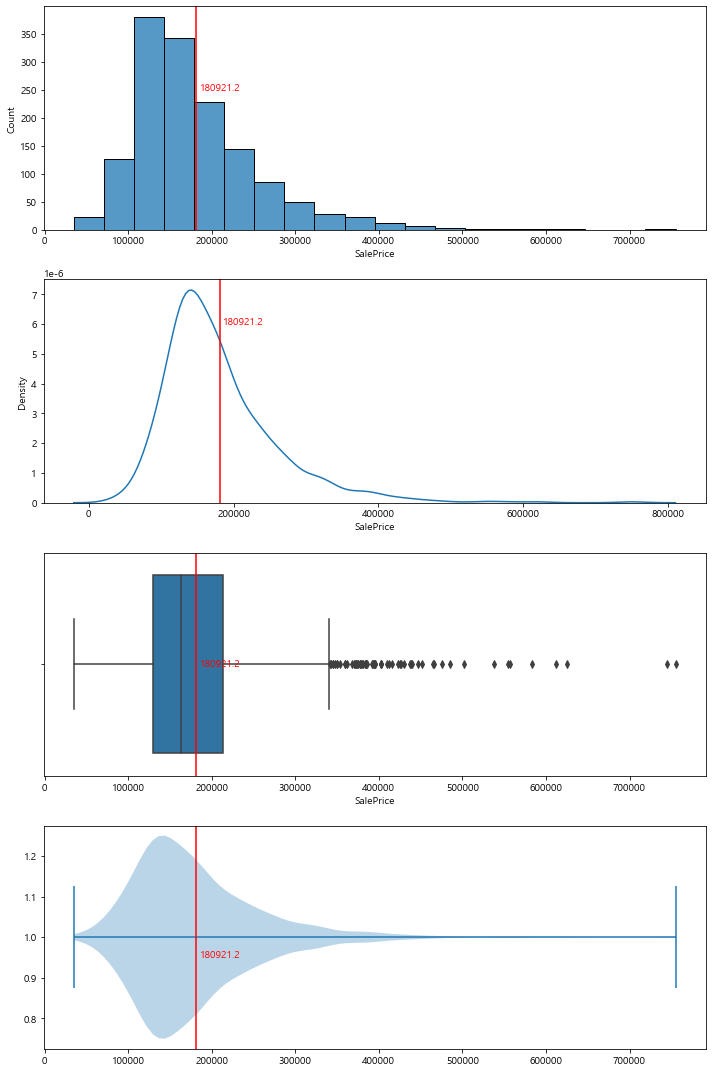

In [9]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 20)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 5000, 250, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 5000, 6e-6, round(var_m, 2), color='r')

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 5000, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 5000, 0.95, round(var_m, 2), color='r')
# 밀도함수와 다른 점: 바이올린 플롯은 min, max부분에서 끝난다.
# 결측치가 존재하면 그래프가 그려지지 않는다.

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 최저가는 34900달러, 최고가는 755000달러로 큰 차이를 보임 (다양한 집 값 분포)
> * 대략 10만~ 20만 달러의 금액대에 많은 집이 분포해있음 (왼쪽으로 치우친 그래프)
> * 평균은 180921 달러이고 상당한 양의 이상치 확인

8) 추가 분석해 볼 사항이 있나요?

> * 집 값에 차이가 많이 나는 이유, 이상치를 확인해 볼 필요가 있음
> * 다른 변수들과 상관관계 확인 필요

### ② feature1

In [10]:
# 범주
var = 'FullBath'

1) 변수의 비즈니스 의미

> * 지상에 있는 욕조 및 샤워 시설이 포함되어있는 욕실의 개수

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [11]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

In [12]:
data[var].unique()

array([2, 1, 3, 0], dtype=int64)

> * 필요

5) 기초통계량(수치화)

In [13]:
# 범주별 빈도수
data[var].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [14]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64

6) 분포 확인(시각화)

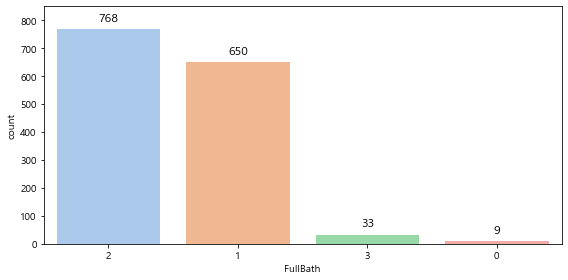

In [15]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 850)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 욕조 및 샤워 시설이 포함되어있는 욕실의 개수가 2개인 집이 가장 많음
> * Full 욕실이 아예 없는 집도 있음 -> Half 욕실만 있거나 지하에만 욕실이 있는 집 존재

8) 추가 분석해 볼 사항이 있나요?

> * Full욕실이 없는 집은 어떤 데이터일지 생각해보면 좋을 것 같음 - 상가 데이터?
> * 욕실의 수와 집 값이 관련이 있을지 확인 필요
> * 더 큰 집일 수록 욕실이 많을까? 확인하면 좋을 것 같음

### ③ feature2

In [16]:
# 범주
var = 'HalfBath'

1) 변수의 비즈니스 의미

> * 분리형(변기와 세면대 정도 있는 간단한) 욕실의 개수

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [17]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

In [18]:
data[var].unique()

array([1, 0, 2], dtype=int64)

> * 필요

5) 기초통계량(수치화)

In [19]:
# 범주별 빈도수
data[var].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [20]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

0    0.625342
1    0.366438
2    0.008219
Name: HalfBath, dtype: float64

6) 분포 확인(시각화)

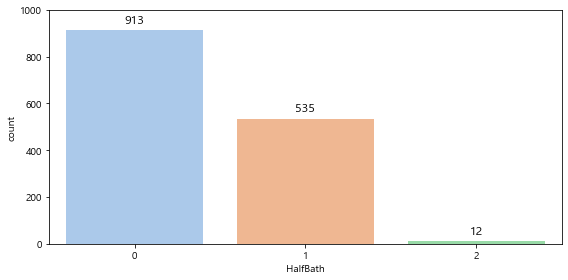

In [21]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 1000)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 분리형(변기와 세면대 정도 있는 간단한) 욕실은 없는 집이 많음
> * 분리형 욕실이 두개 있는 집도 있음

8) 추가 분석해 볼 사항이 있나요?

> * 다른 욕실 관련 데이터와 합쳐서 비교해보면 좋을 것 같음
> * 욕실이 있고 없고로 나누어서 보는 것이 더 좋을 것 같음
> * 옵션이면 분리형 욕실을 가진 집이 가격이 더 높을지 확인 필요

### ④ feature3

In [22]:
# 범주
var = 'BedroomAbvGr'

In [23]:
data = data[data['BedroomAbvGr']!=8]

1) 변수의 비즈니스 의미

> * 침실 개수 (지하 포함하지 않음)

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [24]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

In [25]:
data[var].unique()

array([3, 4, 1, 2, 0, 5, 6], dtype=int64)

> * 필요

5) 기초통계량(수치화)

In [26]:
# 범주별 빈도수
data[var].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
Name: BedroomAbvGr, dtype: int64

In [27]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

3    0.551062
2    0.245374
4    0.145990
1    0.034270
5    0.014393
6    0.004798
0    0.004112
Name: BedroomAbvGr, dtype: float64

6) 분포 확인(시각화)

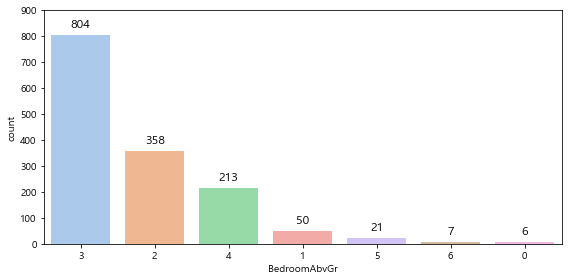

In [28]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 900)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 지상 층에 있는 침실의 개수는 3개에 가장 많이 분포
> * 2개, 4개의 침실을 가진 집이 그 뒤를 따름
> * 지상층에 침실이 없거나, 8개 존재하는 집도 존재
> * 7개의 침실을 가진 데이터는 없음

8) 추가 분석해 볼 사항이 있나요?

> * 침실이 많을수록 집 값이 높을지 확인 필요
> * 침실이 없는 집은 어떤 집일지? 지하에 침실이 존재할까?
> * 집이 넓을수록 침실의 개수가 많아지는지?

### ⑤ feature4

In [29]:
# 범주
var = 'KitchenAbvGr'

In [30]:
data = data[data['KitchenAbvGr']!=0]

1) 변수의 비즈니스 의미

> * 주방 개수 (지하 포함하지 않음)

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [31]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

> * 필요

5) 기초통계량(수치화)

In [32]:
# 범주별 빈도수
data[var].value_counts()

1    1392
2      64
3       2
Name: KitchenAbvGr, dtype: int64

In [33]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

1    0.954733
2    0.043896
3    0.001372
Name: KitchenAbvGr, dtype: float64

6) 분포 확인(시각화)

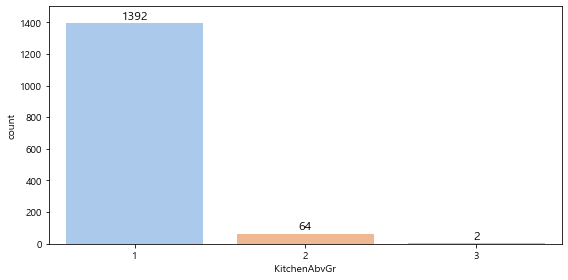

In [34]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 1500)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 지상층에 위치한 주방의 개수는 1개가 압도적으로 많음
> * 2개가 그 뒤를 따르고 있음
> * 주방이 아예 없거나 3개 있는 집도 존재하긴 함

8) 추가 분석해 볼 사항이 있나요?

> * 주방이 2, 3개 있는 집의 가격이 1개인 집보다 높을지 확인 필요
> * 지상층에 주방이 없는 집은 가격이 낮은지, 평수가 좁은지, 지하 층이 있는지 확인 필요

### ⑥ feature5

In [35]:
var = 'KitchenQual'

1) 변수의 비즈니스 의미

> * 주방 퀄리티

|	변수	|	설명	|
|	----	|	----	|
|	Ex	|	Excellent	|
|	Gd	|	Good	|
|	TA  |	Typical/Average	|
|	Fa	|	Fair(평균 이하)	|
|	Po	|	Poor	|

<img src='https://st.depositphotos.com/1561359/5170/v/380/depositphotos_51703287-stock-illustration-evaluation-clipboard.jpg?forcejpeg=true' width=500;>

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [36]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

In [37]:
data[var].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [38]:
# 범주별 빈도수
data[var].value_counts()

TA    734
Gd    586
Ex    100
Fa     38
Name: KitchenQual, dtype: int64

In [39]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

TA    0.503429
Gd    0.401920
Ex    0.068587
Fa    0.026063
Name: KitchenQual, dtype: float64

6) 분포 확인(시각화)

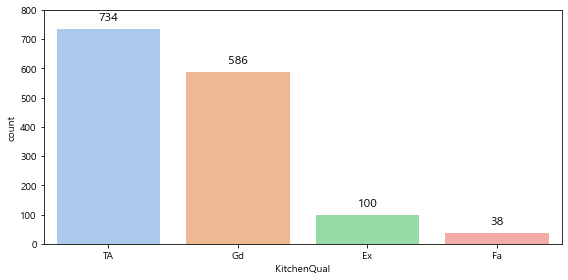

In [40]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 800)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 주방 퀄리티는 대부분 평균이거나 좋음
> * 평균 이하의 데이터도 존재함
> * Poor 등급의 데이터는 없음

8) 추가 분석해 볼 사항이 있나요?

> * 주방 등급에 따른 집 값 확인 필요
> * 건축연도(신축인지), 리모델링 연도와 상관관계 있을 것으로 판단

### ⑦ feature6

In [41]:
# 범주
var = 'TotRmsAbvGrd'

1) 변수의 비즈니스 의미

> * 지상층 토탈 방의 개수 (욕실 제외)

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [42]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

In [43]:
data[var].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2], dtype=int64)

> * 필요

5) 기초통계량(수치화)

In [44]:
# 범주별 빈도수
data[var].value_counts()

6     402
7     329
5     275
8     187
4      96
9      75
10     47
11     18
3      17
12     11
2       1
Name: TotRmsAbvGrd, dtype: int64

In [45]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

6     0.275720
7     0.225652
5     0.188615
8     0.128258
4     0.065844
9     0.051440
10    0.032236
11    0.012346
3     0.011660
12    0.007545
2     0.000686
Name: TotRmsAbvGrd, dtype: float64

6) 분포 확인(시각화)

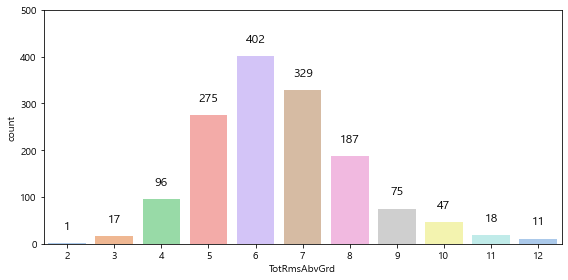

In [46]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"))


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 500)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 지상층에 위치하고 욕실이 아닌 방의 합은 6개가 가장 많음
> * 그 뒤를 7개, 5개, 8개가 따르고 있음
> * 방의 개수가 10개 이상인 방도 있음
> * 방이 없거나, 1개, 13개인 데이터는 없음

8) 추가 분석해 볼 사항이 있나요?

> * 방의 개수가 많을수록 집 값이 높은지 확인 필요
> * 방의 개수와 평수 상관관계 높을 것으로 추정
> * 방의 개수와 층수별 면적과 상관관계 있을 것으로 추정

### ⑧ feature7

In [47]:
var = 'Functional'

In [48]:
data = data[data['Functional']!='Sev']

1) 변수의 비즈니스 의미

> * 집 기능 (공제가 보장되지 않는 한 Typical로 가정)

|	변수	|	설명	|
|	----	|	----	|
|	Typ	|	일반적인 기능	|
|	Min1	|	최소한의 공제 1	|
|	Min2  |	최소한의 공제 2	|
|	Mod	|	보통의 공제	|
|	Maj1	|	주요 공제 1	|
|	Maj2	|	주요 공제 2	|
|	Sev	|	심하게 손상된 집 (by 화재)	|
|	Sal	|	Salvage only 옵션 (회수전용)	|

Sev 사진

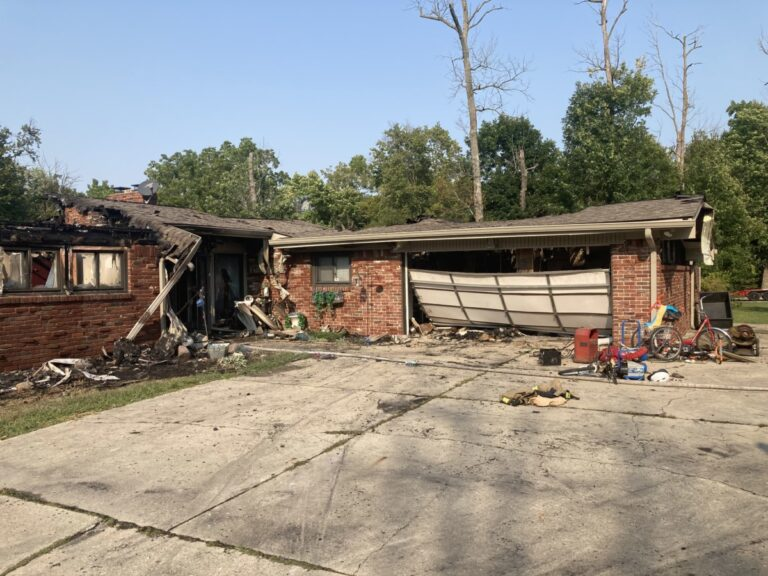

In [49]:
from IPython.display import Image

Image("sev.png")

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [50]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

In [51]:
data[var].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [52]:
# 범주별 빈도수
data[var].value_counts()

Typ     1358
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Name: Functional, dtype: int64

In [53]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Typ     0.932052
Min2    0.023336
Min1    0.021277
Mod     0.010295
Maj1    0.009609
Maj2    0.003432
Name: Functional, dtype: float64

6) 분포 확인(시각화)

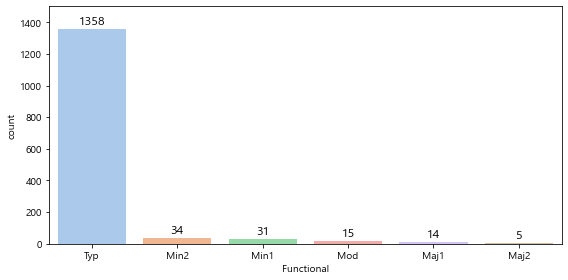

In [54]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 1500)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 일반적인 공제를 해주는 집이 많음 (공제가 보장되지 않은 경우도 포함이기 때문에 더 많은 것으로 판단)
> * 최소한의(마이너한) 공제를 해주는 집이 그 뒤를 따르고 보통의 공제나 주요 공제를 해주는 집은 많지 않음
> * 심하게 손상된 집 데이터 1개 존재
> * Salvage only 옵션 (회수전용) 데이터는 없음

8) 추가 분석해 볼 사항이 있나요?

> * 집 값이 높을수록 주요 공제를 해줄까? 집 값 이상치 데이터와 관련있는지 확인 필요
> * 데이터가 불균형하기 때문에 일반적인 공제를 제외하고 분포 확인해봐도 좋을 것 같음

### ⑨ feature8

In [55]:
# 범주
var = 'Fireplaces'

1) 변수의 비즈니스 의미

> * 벽난로 개수

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [56]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

In [57]:
data[var].unique()

array([0, 1, 2, 3], dtype=int64)

> * 필요

5) 기초통계량(수치화)

In [58]:
# 범주별 빈도수
data[var].value_counts()

0    688
1    649
2    115
3      5
Name: Fireplaces, dtype: int64

In [59]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

0    0.472203
1    0.445436
2    0.078929
3    0.003432
Name: Fireplaces, dtype: float64

6) 분포 확인(시각화)

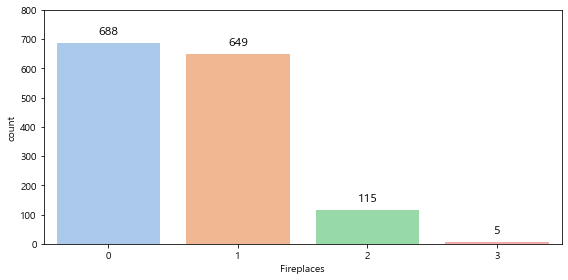

In [60]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 800)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 벽난로는 없는 집이 대다수이고, 1개 있는 집이 그 뒤를 따르고 있음
> * 벽난로가 2, 3개 있는 집도 존재

8) 추가 분석해 볼 사항이 있나요?

> * 벽난로의 개수와 집 값이 연관이 있는지 확인 필요
> * 벽난로 개수가 많으면 평수가 넓거나 층마다 있는 것일까?
> * 추운 지역쪽의 집에 벽난로가 있을 것으로 추정

### ⑩ feature9

In [61]:
var = 'FireplaceQu'

1) 변수의 비즈니스 의미

> * 벽난로 퀄리티

|	변수	|	설명	|
|	----	|	----	|
|	Ex	|	Excellent (뛰어난 석조 벽난로)	|
|	Gd	|	Good (메인 레벨의 벽돌 벽난로)	|
|	TA  |	평균 (주 거실의 조립식 벽난로 또는 지하실의 석조 벽난로)	|
|	Fa	|	Fair (지하실에 조립식 벽난로)	|
|	Po	|	Poor (Ben Franklin Stove)	|
|	NA	|	벽난로 없음	|

Ben Franklin Stove (화로)

<img src='https://upload.wikimedia.org/wikipedia/commons/b/b3/Franklin_stove.jpg' width=500;>

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [62]:
data[var].isna().sum()

688

> * 결측치 690 - 벽난로 없는 데이터 이므로 No로 채워줌

In [63]:
data[var].fillna('No', inplace=True)

In [64]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [65]:
data[var].unique()

array(['No', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [66]:
# 범주별 빈도수
data[var].value_counts()

No    688
Gd    380
TA    313
Fa     33
Ex     24
Po     19
Name: FireplaceQu, dtype: int64

In [67]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

No    0.472203
Gd    0.260810
TA    0.214825
Fa    0.022649
Ex    0.016472
Po    0.013040
Name: FireplaceQu, dtype: float64

6) 분포 확인(시각화)

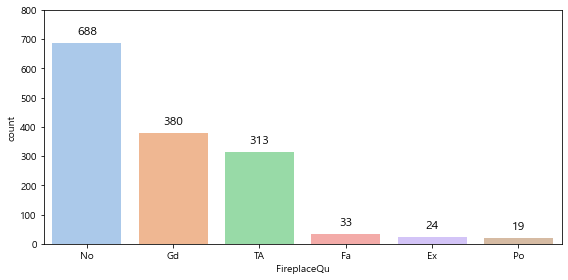

In [68]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 800)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 벽난로는 없는 집이 상당수임
> * 있는 경우 상태가 좋거나 일반적인 경우가 많음
> * 평균이하이거나 아주 뛰어난 석조 벽난로도 있으나 화로식도 존재

8) 추가 분석해 볼 사항이 있나요?

> * 뛰어난 석조 벽난로가 있거나 상태가 좋은 벽난로인 집은 가격이 높을까?
> * 추운 지역이어서 오히려 집 값이 낮을수도 있을수도...
> * 화로식 벽난로 있는 집은 지어진 지 오래된 집일 가능성 있음 (건축년도)

### ⑪ feature10

In [69]:
var = 'GarageType'

1) 변수의 비즈니스 의미

> * 차고 위치

|	변수	|	설명	|
|	----	|	----	|
|	2Types	|	2개 이상의 유형의 차고	|
|	Attchd	|	집에 붙어 있음	|
|	Basment  |	지하 차고	|
|	BuiltIn	|	빌트인(집의 차고 부분 - 일반적으로 차고 위에 공간 있음)	|
|	CarPort	|	차고	|
|	Detchd	|	집에서 떨어져 있음	|
|	NA	|	차고 없음	|

CarPort 이미지

<img src='https://www.sepalumic.com/sites/default/files/styles/produit_header/public/produits/carport_sepalumic_0.jpg?itok=tJR8uBFx' width=500;>

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [70]:
data[var].isna().sum()

79

> * 결측치 81 - 차고 없는 데이터 이므로 No로 채워줌

In [71]:
data[var].fillna('No', inplace=True)

In [72]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [73]:
data[var].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'No', 'Basment',
       '2Types'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [74]:
# 범주별 빈도수
data[var].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
No          79
Basment     19
CarPort      8
2Types       6
Name: GarageType, dtype: int64

In [75]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Attchd     0.597117
Detchd     0.265614
BuiltIn    0.060398
No         0.054221
Basment    0.013040
CarPort    0.005491
2Types     0.004118
Name: GarageType, dtype: float64

6) 분포 확인(시각화)

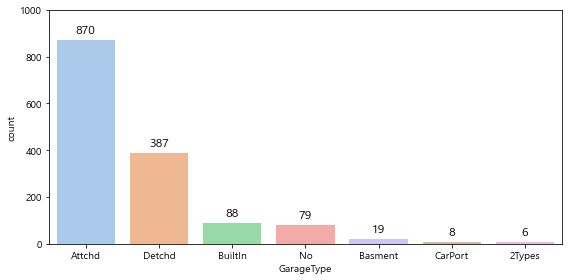

In [76]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 1000)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 차고는 집에 붙어있는 데이터가 많음
> * 떨어진 경우와 빌트인인 경우가 뒤를 따르고, 차고가 없는 집도 꽤 있음
> * 두가지 유형을 다 가진 차고를 가진 집도 있음 

8) 추가 분석해 볼 사항이 있나요?

> * 차고의 유형과 집 값의 관계 확인 필요
> * 차고가 없는 집 81개의 데이터 존재 -> 소득이 비교적 적어 차가 없는 사람들을 위한? -> 집값이 낮을까?

### ⑫ feature11

In [77]:
# 범주
var = 'GarageYrBlt'

1) 변수의 비즈니스 의미

> * 차고 건설 연도

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [78]:
data[var].isna().sum()

79

> * 결측치 81 - 차고 없는 데이터 이므로 0로 채워줌

In [79]:
data[var].fillna(0, inplace=True)

In [80]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [81]:
data[var].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,    0., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

> * 모델 학습할 때 중요하게 작용하기 어려운 데이터이기 때문에 필요하지 않음

5) 기초통계량(수치화)

In [82]:
# 범주별 빈도수
data[var].value_counts()

0.0       79
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [83]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

0.0       0.054221
2005.0    0.044612
2006.0    0.040494
2004.0    0.036376
2003.0    0.034317
            ...   
1906.0    0.000686
1908.0    0.000686
1933.0    0.000686
1900.0    0.000686
1927.0    0.000686
Name: GarageYrBlt, Length: 98, dtype: float64

In [84]:
data[var].describe()

count    1457.000000
mean     1871.238847
std       448.838260
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [85]:
bin = [-np.inf, 1, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, np.inf]
label = ['No', '1900년대', '1910년대', '1920년대', '1930년대', '1940년대', '1950년대', '1960년대', '1970년대', '1980년대', '1990년대', '2000년대']

data['GarageYrBlt_2'] = pd.cut(data[var], bins=bin, labels=label, right=False)

6) 분포 확인(시각화)

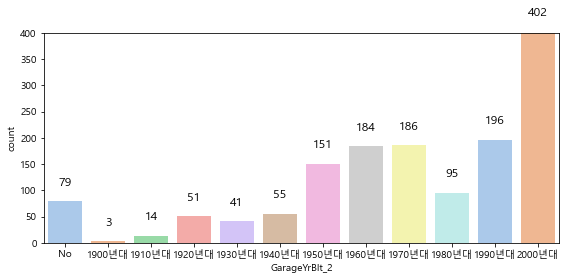

In [86]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data['GarageYrBlt_2'], palette = sns.color_palette("pastel"), order = ['No', '1900년대', '1910년대', '1920년대', '1930년대', '1940년대', '1950년대', '1960년대', '1970년대', '1980년대', '1990년대', '2000년대'])


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 400)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 10년도 단위로 나누어 데이터 확인 결과 2000년대 이상의 데이터가 가장 많음
> * 차고가 건설 된 연도는 다양하게 분포 50~70년대, 90년대가 뒤를 따름

8) 추가 분석해 볼 사항이 있나요?

> * 집의 건축 연도, 리모델링 연도와 강한 상관관계 있을 것으로 판단
> * 차고가 건축된 연도가 늦을수록 더 신축 집일 확률이 높기 때문에 집 값 높을 것으로 추정

### ⑬ feature12

In [87]:
var = 'GarageFinish'

1) 변수의 비즈니스 의미

> * 차고 인테리어 마감 상태

|	변수	|	설명	|
|	----	|	----	|
|	Fin	|	Finished	|
|	RFn	|	Rough Finished (대강 완료)	|
|	Unf  |	Unfinished	|
|	No	|	차고 없음	|

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [88]:
data[var].isna().sum()

79

> * 결측치 81 - 차고 없는 데이터 이므로 No로 채워줌

In [89]:
data[var].fillna('No', inplace=True)

In [90]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [91]:
data[var].unique()

array(['RFn', 'Unf', 'Fin', 'No'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [92]:
# 범주별 빈도수
data[var].value_counts()

Unf    604
RFn    422
Fin    352
No      79
Name: GarageFinish, dtype: int64

In [93]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Unf    0.414550
RFn    0.289636
Fin    0.241592
No     0.054221
Name: GarageFinish, dtype: float64

6) 분포 확인(시각화)

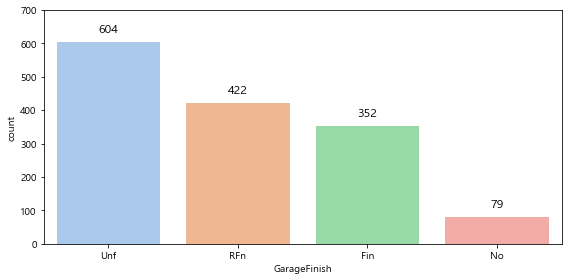

In [94]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 700)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 차고 인테리어 마감 상태는 Unfinished 상태가 대부분 차지하고 있음
> * 마감이 좋지 않은 상태이거나 대강 완료된 상태가 다수를 차지하고 있음
> * 오래된 집이 많을 것이라고 예측

8) 추가 분석해 볼 사항이 있나요?

> * 건축연도, 리모델링 feature 와의 상관관계 확인 필요
> * 집 값과도 확인 필요

### ⑭ feature13

In [95]:
var = 'GarageCars'

1) 변수의 비즈니스 의미

> * 몇 대의 차를 수용 가능한지 (차고 크기)

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [96]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

In [97]:
data[var].unique()

array([2, 3, 1, 0, 4], dtype=int64)

> * 필요

5) 기초통계량(수치화)

In [98]:
# 범주별 빈도수
data[var].value_counts()

2    823
1    369
3    181
0     79
4      5
Name: GarageCars, dtype: int64

In [99]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

2    0.564859
1    0.253260
3    0.124228
0    0.054221
4    0.003432
Name: GarageCars, dtype: float64

6) 분포 확인(시각화)

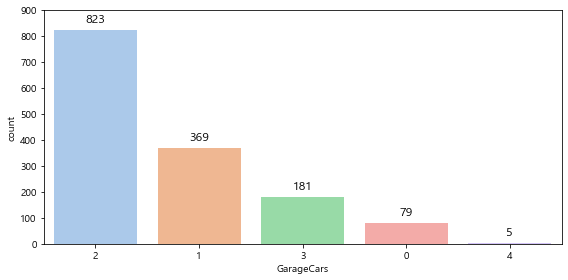

In [100]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 900)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 차고 크기는 2대를 수용할 수 있는 정도가 가장 많음
> * 차 1대, 3대를 수용할 수 있는 크기가 그 뒤를 따르고 있음

8) 추가 분석해 볼 사항이 있나요?

> * 집 값과 관련 있을 것이라고 판단
> * 4대 수용가능한 집은 이상치 데이터일 것으로 추정
> * 차고 면적, 집 면적과 비교해 볼 필요 있음

### ⑮ feature14

In [101]:
var = 'GarageArea'

1) 변수의 비즈니스 의미

> * 평방 피트의 차고 크기

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [102]:
data[var].isna().sum()

0

> * 결측치 없음

4) 가변수화 필요 여부

> * 숫자형이기때문에 가변수화 불필요

5) 기초통계량(수치화)

In [103]:
data[var].describe()

count    1457.000000
mean      473.544955
std       213.280778
min         0.000000
25%       336.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

6) 분포 확인(시각화)

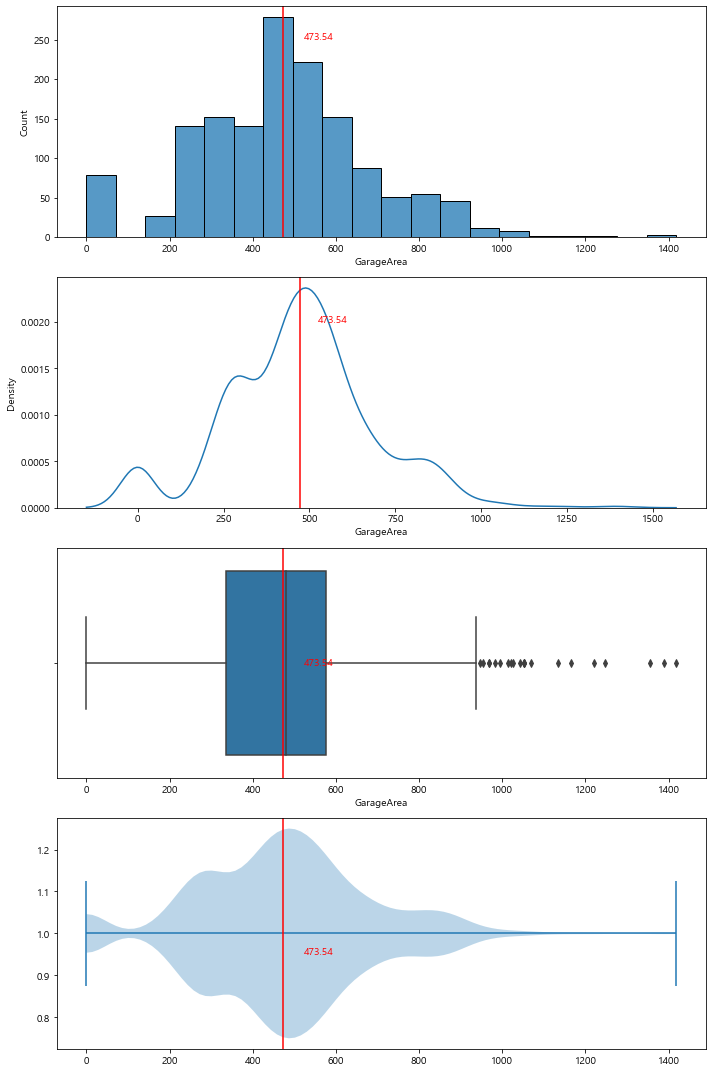

In [104]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 20)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 250, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.002, round(var_m, 2), color='r')

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.95, round(var_m, 2), color='r')
# 밀도함수와 다른 점: 바이올린 플롯은 min, max부분에서 끝난다.
# 결측치가 존재하면 그래프가 그려지지 않는다.

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 차고 면적의 이상치와 집 값의 이상치 관련있을 것이라고 판단
> * 차고 면적의 평균은 472.98피트로 대략 13.3평 정도

8) 추가 분석해 볼 사항이 있나요?

> * 차고 면적과, 집의 면적 확인해보면 좋을 것 같음
> * 차고 면적이 높으면 수용할 수 있는 차가 많을 것
> * 차가 많은 사람은 자산이 높을 것으로 판단되어 집 값과도 확인 필요

### ⑯ feature15

In [105]:
var = 'GarageQual'

1) 변수의 비즈니스 의미

> * 차고 퀄리티

|	변수	|	설명	|
|	----	|	----	|
|	Ex	|	Excellent	|
|	Gd	|	Good	|
|	TA  |	Typical/Average	|
|	Fa  |	Fair(평균 이하)	|
|	Po  |	Poor	|
|	No	|	차고 없음	|

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [106]:
data[var].isna().sum()

79

> * 결측치 81 - 차고 없는 데이터 이므로 No로 채워줌

In [107]:
data[var].fillna('No', inplace=True)

In [108]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [109]:
data[var].unique()

array(['TA', 'Fa', 'Gd', 'No', 'Ex', 'Po'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [110]:
# 범주별 빈도수
data[var].value_counts()

TA    1310
No      79
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [111]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

TA    0.899108
No    0.054221
Fa    0.032944
Gd    0.009609
Ex    0.002059
Po    0.002059
Name: GarageQual, dtype: float64

6) 분포 확인(시각화)

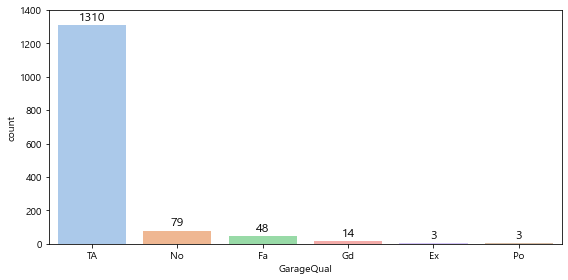

In [112]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 1400)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 차고 있는 경우 대부분이 일반적인 퀄리티를 보임
> * 다음으로 차고 없음이 가장 높은 분포
> * 일반적인 퀄리티를 제외하고는 비슷한 분포를 보임

8) 추가 분석해 볼 사항이 있나요?

> * 데이터가 불균형하기 때문에 일반적인 퀄리티를 제외하고 확인해볼 필요 있음
> * 차고 인테리어 상태와 관련 있을 것이라고 판단
> * 차고 지어진 연도와 상관관계 있을 것이라고 판단 -> 신축일수록 좋은 퀄리티
> * 집 값과 관련 있는지 확인 필요

### ⑰ feature16

In [113]:
var = 'GarageCond'

1) 변수의 비즈니스 의미

> * 차고 상태

|	변수	|	설명	|
|	----	|	----	|
|	Ex	|	Excellent	|
|	Gd	|	Good	|
|	TA  |	Typical/Average	|
|	Fa  |	Fair(평균 이하)	|
|	Po  |	Poor	|
|	No	|	차고 없음	|

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [114]:
data[var].isna().sum()

79

> * 결측치 81 - 차고 없는 데이터 이므로 No로 채워줌

In [115]:
data[var].fillna('No', inplace=True)

In [116]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [117]:
data[var].unique()

array(['TA', 'Fa', 'No', 'Gd', 'Po', 'Ex'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [118]:
# 범주별 빈도수
data[var].value_counts()

TA    1325
No      79
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [119]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

TA    0.909403
No    0.054221
Fa    0.024022
Gd    0.006177
Po    0.004804
Ex    0.001373
Name: GarageCond, dtype: float64

6) 분포 확인(시각화)

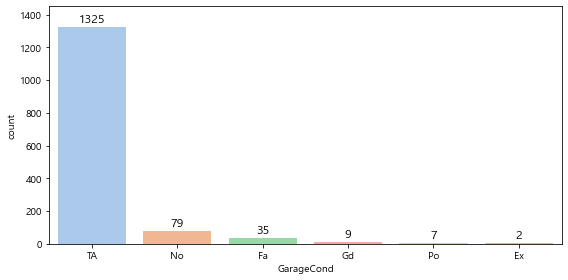

In [120]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (8,4))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
    ax.set_ylim(0, 1450)
    
plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 차고 상태는 일반적인 데이터가 가장 많음
> * 나머지는 비슷한 분포를 보임

8) 추가 분석해 볼 사항이 있나요?

> * 차고 퀄리티 데이터와 비슷하게 데이터 불균형을 보임
> * 차고 퀄리티랑 강한 상관관계 보일 것으로 판단 (어떤 차이가 있는지..?)
> * 집 값과 상관관계 있는지 확인 필요

## 3.이변량 분석

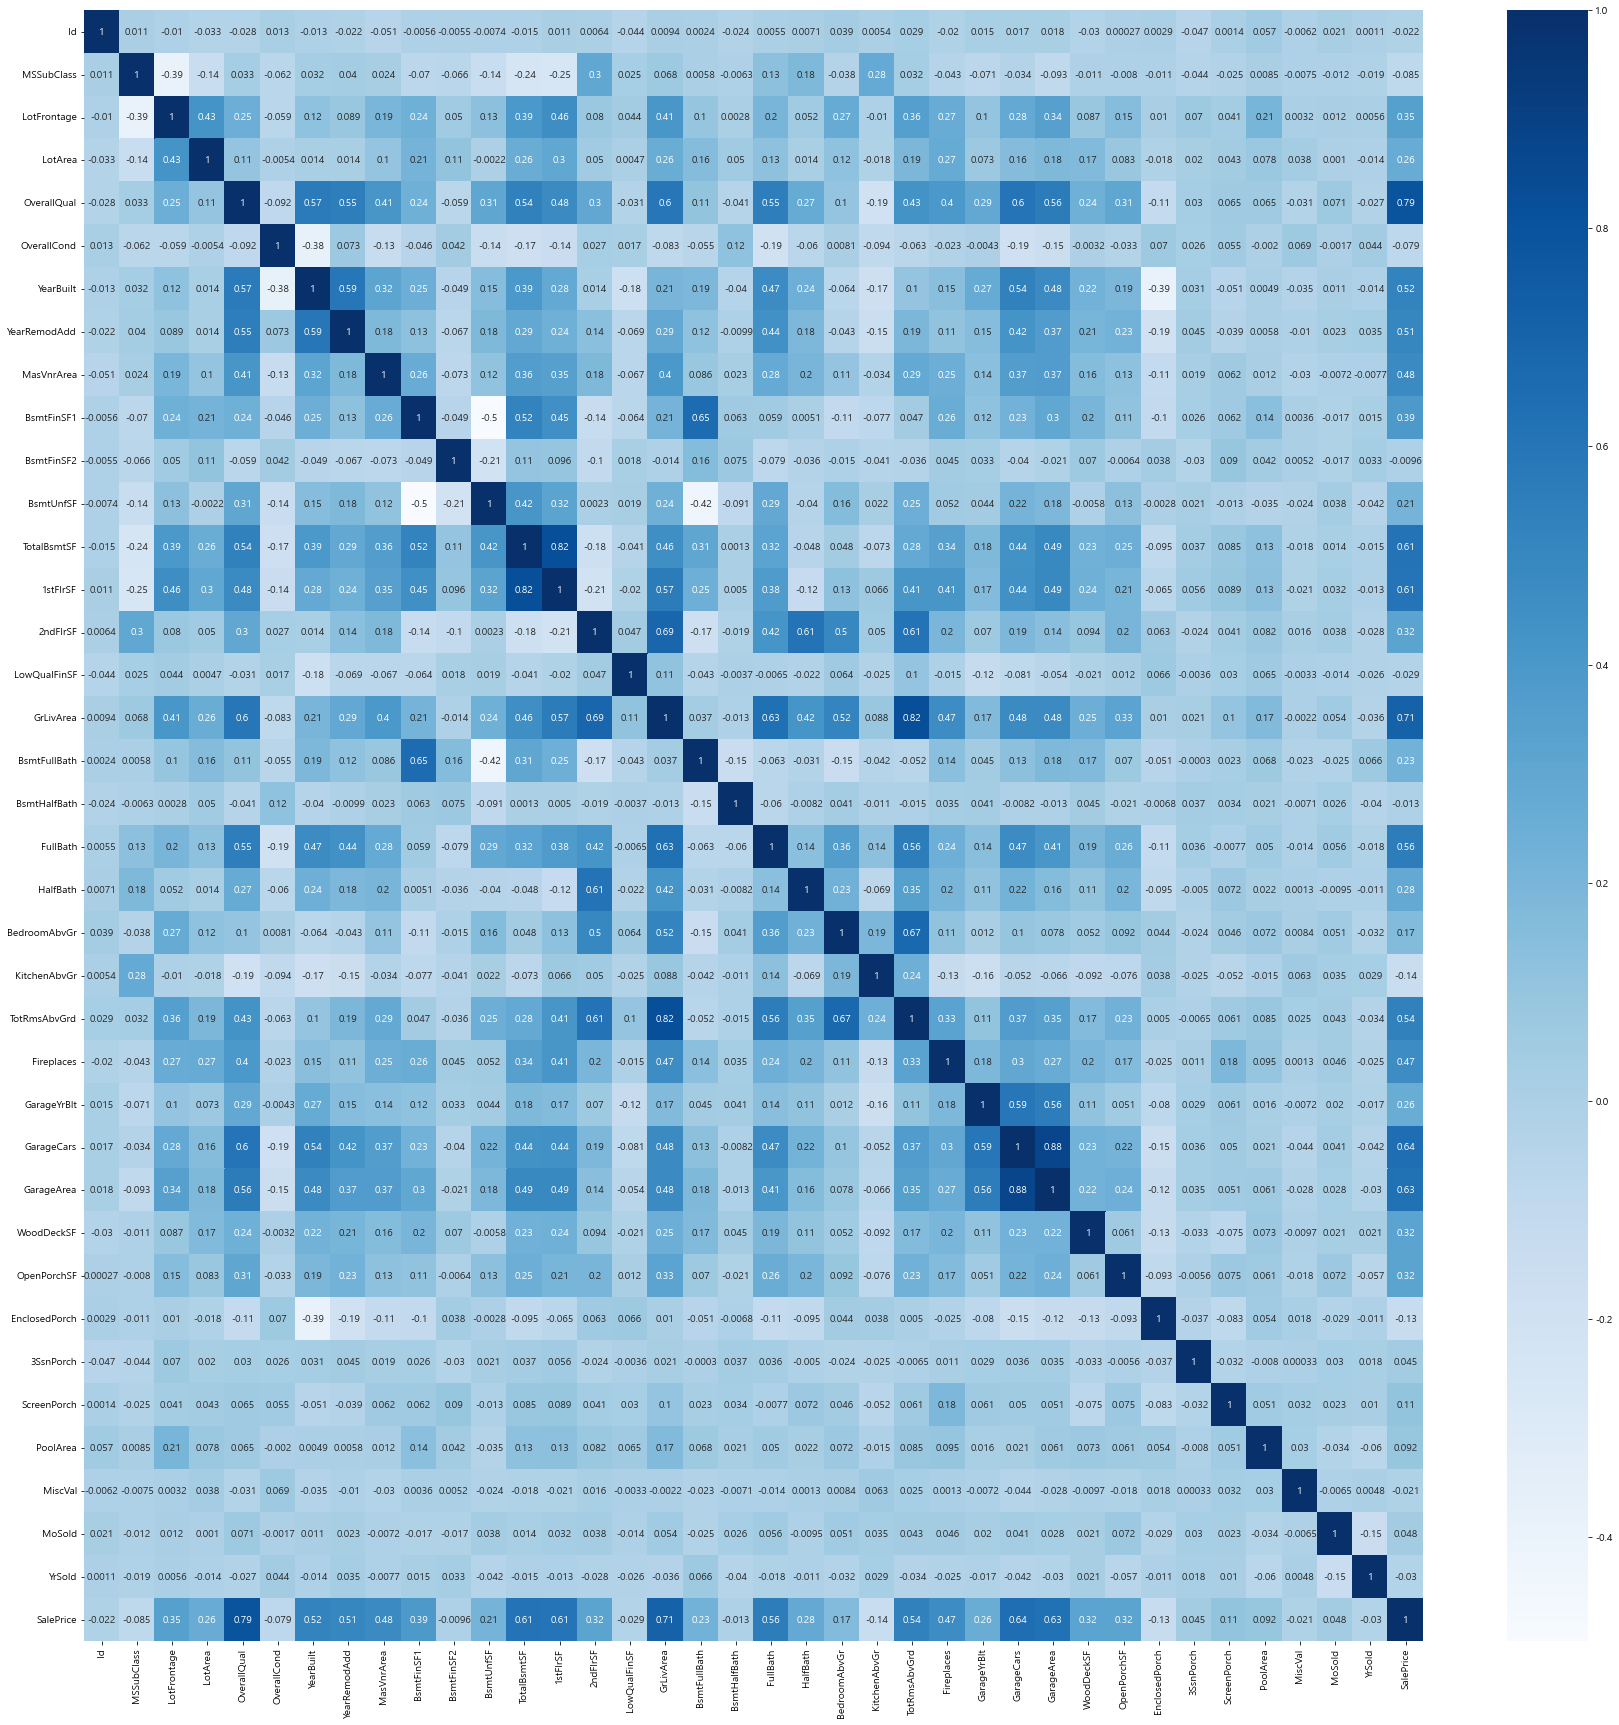

In [121]:
# 상관관계 시각화
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

Fullbath 0.56, TotRmsAbvGrd 0.53, Fireplaces 0.47, GarageCars 0.64, GarageArea 0.62

In [122]:
target = 'SalePrice'

### (1) 범주형 X --> 숫자형 Y

* 그래프 : bar plot
* 수치화 : t-test, 분산분석  
* 관계 평가

#### ① feature --> target (다른)

In [123]:
feature = 'FullBath'

1) 시각화

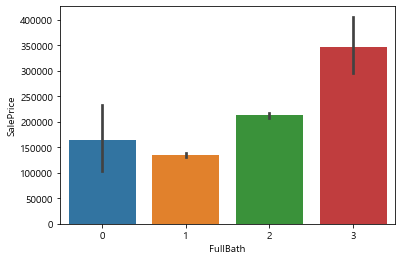

In [124]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

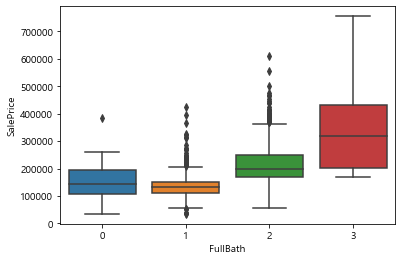

In [125]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [126]:
import scipy.stats as spst

In [127]:
fb0 = data.loc[data[feature]==0,target]
fb1 = data.loc[data[feature]==1,target]
fb2 = data.loc[data[feature]==2,target]
fb3 = data.loc[data[feature]==3,target]
spst.f_oneway(fb0, fb1, fb2,fb3)

F_onewayResult(statistic=246.83585056952342, pvalue=1.979085754566984e-129)

3) 관계 평가하기

- 3개의 욕실을 가진 집값이 가장 높음
- 0, 3 값이 상대적으로 적기 때문에 표준편차가 큼
- 1, 2 값에서는 이상치 확인 가능
- p-value 값이 0에 가깝게 수렴하기 때문에 강한 상관관계라고 판단

4) 추가 분석할 내용 정리

2ndFlrSF와 비교 분석

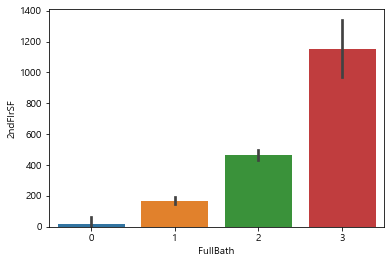

In [128]:
sns.barplot(x=feature, y='2ndFlrSF', data=data)
plt.show()

In [129]:
fb0 = data.loc[data[feature]==0,'2ndFlrSF']
fb1 = data.loc[data[feature]==1,'2ndFlrSF']
fb2 = data.loc[data[feature]==2,'2ndFlrSF']
fb3 = data.loc[data[feature]==3,'2ndFlrSF']
spst.f_oneway(fb0, fb1, fb2,fb3)

F_onewayResult(statistic=116.46051789374606, pvalue=1.3854031019018453e-67)

- 욕실 개수가 많으면 2층의 평수가 넓음
- 강한 양의 상관관계

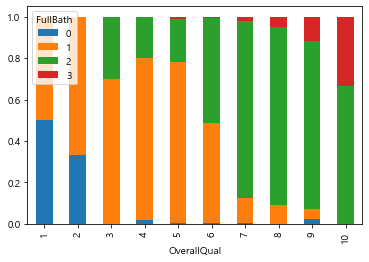

In [130]:
temp = pd.crosstab(data['OverallQual'], data[feature], normalize = 'index')

temp.plot.bar(stacked=True)
plt.show()

In [131]:
table = pd.crosstab(data[feature], data['OverallQual'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

교차표
 OverallQual  1   2   3   4    5    6    7    8   9   10
FullBath                                               
0             1   1   0   2    1    1    2    0   1   0
1             1   2  14  91  309  179   37   15   2   0
2             0   0   6  23   83  188  273  145  35  12
3             0   0   0   0    4    3    7    8   5   6
----------------------------------------------------------------------------------------------------
카이제곱통계량 741.5991367931498
p-value 7.24020621479229e-139


- 카이제곱통계량 높고, p-value 0에 수렴하며 강한 상관관계 보임
- 욕실 개수 많을수록 전체 재료 및 마감 품질 좋음

#### ② feature --> target

In [132]:
feature = 'HalfBath'

1) 시각화

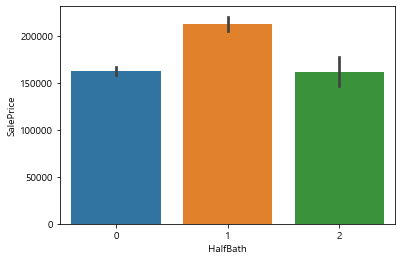

In [133]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

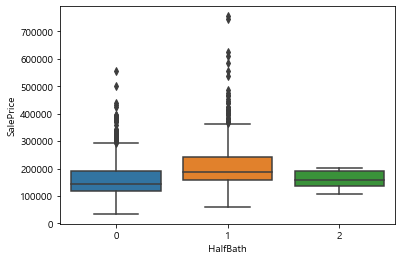

In [134]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [135]:
hb0 = data.loc[data[feature]==0,target]
hb1 = data.loc[data[feature]==1,target]
hb2 = data.loc[data[feature]==2,target]
spst.f_oneway(hb0, hb1, hb2)

F_onewayResult(statistic=74.72774186404969, pvalue=1.2821888005415235e-31)

3) 관계 평가하기

- 분리형 욕실이 하나 있는 집의 집값 평균이 가장 높음
- 2개인 집은 표준편차가 큼 (데이터가 적어서인 것으로 추정)
- p-value 0 에 가까우므로 강한 상관관계 보임

##### 추가 분석

분리형 욕실을 가진 집과 아닌 집으로 나누어서 확인 (1,2 데이터 합쳐도 0보다 적기 때문)

In [136]:
data['HalfBath_2'] = data[feature].map({0:'N', 1:'Y', 2:'Y'})

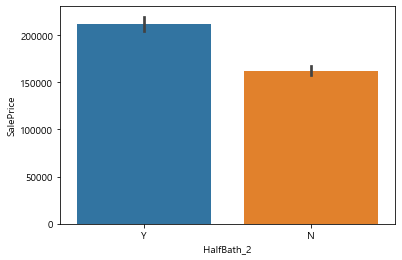

In [137]:
sns.barplot(x='HalfBath_2', y=target, data=data)
plt.show()

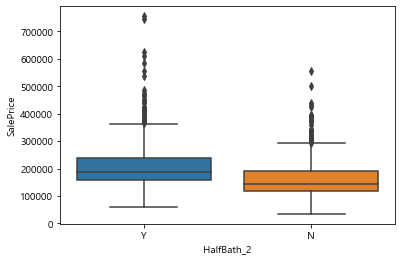

In [138]:
sns.boxplot(x='HalfBath_2', y=target, data=data)
plt.show()

In [139]:
n = data.loc[data['HalfBath_2']=='N',target]
y = data.loc[data['HalfBath_2']=='Y',target]

spst.ttest_ind(n, y)

Ttest_indResult(statistic=-11.989326946403482, pvalue=1.1863904475493135e-31)

- 평균 차이가 더 잘 보여짐
- p-value는 큰 차이 없음 f통계량과 t통계량은 차이 보임 (음수로 바뀜)

#### ③ feature --> target

In [140]:
feature = 'BedroomAbvGr'

1) 시각화

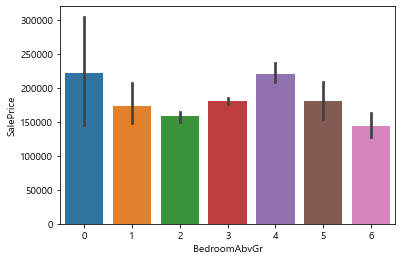

In [141]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

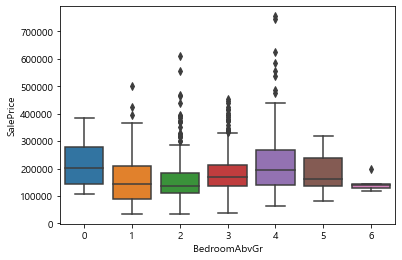

In [142]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [143]:
fb0 = data.loc[data[feature]==0,target]
fb1 = data.loc[data[feature]==1,target]
fb2 = data.loc[data[feature]==2,target]
fb3 = data.loc[data[feature]==3,target]
fb4 = data.loc[data[feature]==4,target]
fb5 = data.loc[data[feature]==5,target]
fb6 = data.loc[data[feature]==6,target]

spst.f_oneway(fb0, fb1, fb2, fb3, fb4, fb5, fb6)

F_onewayResult(statistic=15.231389084570246, pvalue=5.51984683835514e-17)

3) 관계 평가하기

- 0, 1, 5 표준편차가 큼
- 1, 2, 3, 4 에서는 이상치 확인
- 박스플롯으로 보았을 때, 8은 데이터가 거의 없음
- p-value 값이 0에 가깝게 수렴하기 때문에 상관관계 있다고 판단

##### 추가 분석

침실 개수 보통(0-2), 조금 있는(3-5), 많은(6-) 으로 나누어서 확인

In [144]:
data['BedroomAbvGr_2'] = data[feature].map({0:'0~2', 1:'0~2', 2:'0~2',
                                            3:'3~5', 4:'3~5',
                                            5:'3~5', 6:'6~', 8:'6~'})

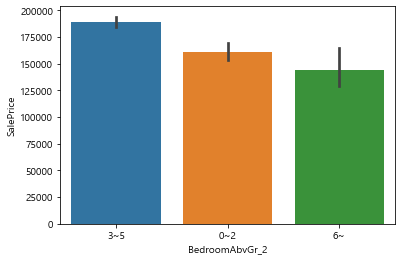

In [145]:
sns.barplot(x='BedroomAbvGr_2', y=target, data=data)
plt.show()

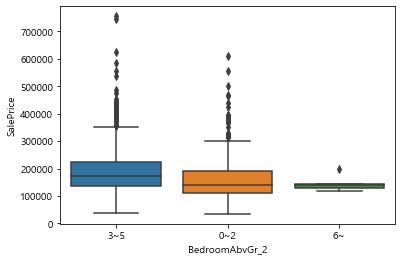

In [146]:
sns.boxplot(x='BedroomAbvGr_2', y=target, data=data)
plt.show()

In [147]:
nb = data.loc[data['BedroomAbvGr_2']=='0~2',target]
sb = data.loc[data['BedroomAbvGr_2']=='3~5',target]
mb = data.loc[data['BedroomAbvGr_2']=='6~',target]

spst.f_oneway(nb, sb, mb)

F_onewayResult(statistic=20.056713199113045, pvalue=2.555461245420507e-09)

- f통계량 높아졌지만. p-value도 같이 높아짐
- 상관관계는 있으나 이전 데이터 채택

#### ④ feature --> target

In [148]:
feature = 'KitchenAbvGr'

1) 시각화

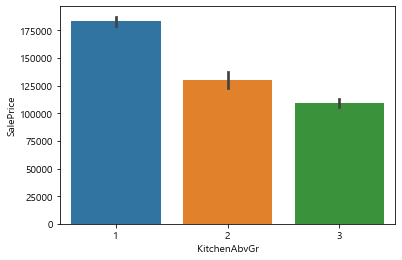

In [149]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

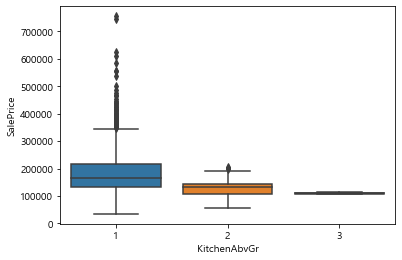

In [150]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [151]:
ka1 = data.loc[data[feature]==1,target]
ka2 = data.loc[data[feature]==2,target]
ka3 = data.loc[data[feature]==3,target]
spst.f_oneway(ka1, ka2, ka3)

F_onewayResult(statistic=14.895974454449997, pvalue=3.945890997367048e-07)

3) 관계 평가하기

- 1개의 주방을 가진 집의 데이터는 많이 있으나 나머지 데이터는 거의 없음
- 데이터 편중이 심해 1개의 주방을 가진 데이터에서 이상치 확인됨
- 다른 데이터에 비해서는 f통계량 작지만, p-value 0에 가깝기 때문에 상관관계 있다고 판단

##### 추가 분석 (유..?)

0인 데이터 1개이기 때문에 1개로 합쳐주고 2개 이상 합쳐줌

In [152]:
data['KitchenAbvGr_2'] = data[feature].map({1:'1개', 2:'2개 이상', 3:'2개 이상'})

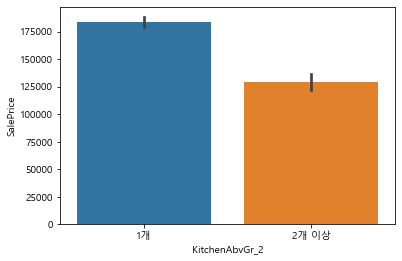

In [153]:
sns.barplot(x='KitchenAbvGr_2', y=target, data=data)
plt.show()

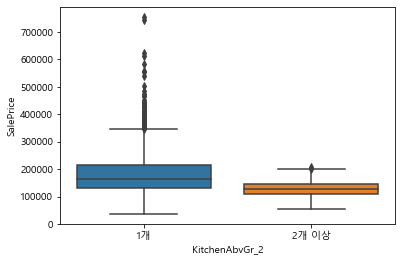

In [154]:
sns.boxplot(x='KitchenAbvGr_2', y=target, data=data)
plt.show()

In [155]:
gr1 = data.loc[data['KitchenAbvGr_2']=='1개',target]
gr2 = data.loc[data['KitchenAbvGr_2']=='2개 이상',target]

spst.ttest_ind(gr1, gr2)

Ttest_indResult(statistic=5.447750805443945, pvalue=5.981807515056509e-08)

- p-value 0에 더 가까워짐
- F통계량, T통계량 차이는... 일단 숫자는 낮아짐

#### ⑤ feature --> target

In [156]:
feature = 'KitchenQual'

1) 시각화

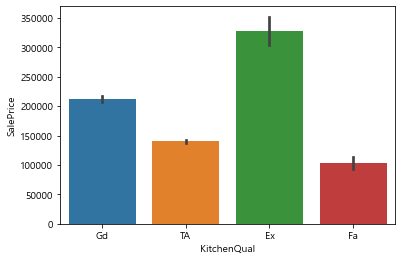

In [157]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

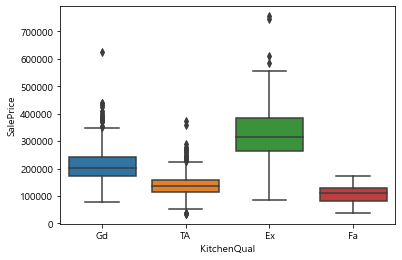

In [158]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [159]:
gd = data.loc[data[feature]=='Gd',target]
ta = data.loc[data[feature]=='TA',target]
ex = data.loc[data[feature]=='Ex',target]
fa = data.loc[data[feature]=='Fa',target]

spst.f_oneway(gd, ta, ex, fa)

F_onewayResult(statistic=408.0748428508533, pvalue=3.0669301958454065e-192)

3) 관계 평가하기

- 뛰어난 수준이 가장 집값이 높음
- 뛰어난 수준을 제외하고 표준편차가 작은편
- 평균이하의 데이터를 제외하고 이상치 확인
- p-value 값이 0에 가깝게 수렴하기 때문에 강한 상관관계라고 판단

##### 추가 분석

아주 좋음, 좋음 합쳐주고 평균과 평균이하 데이터 합쳐줌

In [160]:
data['KitchenQual_2'] = data[feature].map({'Ex':'Gd', 'Gd':'Gd', 'TA':'TA', 'Fa':'TA'})

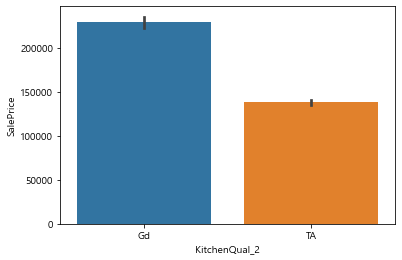

In [161]:
sns.barplot(x='KitchenQual_2', y=target, data=data)
plt.show()

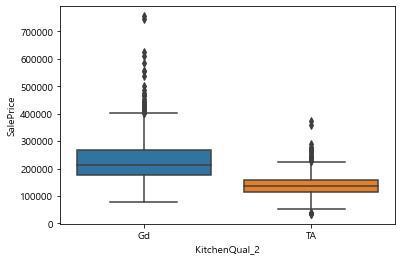

In [162]:
sns.boxplot(x='KitchenQual_2', y=target, data=data)
plt.show()

In [163]:
gd = data.loc[data['KitchenQual_2']=='Gd',target]
ta = data.loc[data['KitchenQual_2']=='TA',target]

spst.ttest_ind(gd, ta)

Ttest_indResult(statistic=26.532245796982693, pvalue=7.639105872018094e-127)

- t통계량 값도 작아지고 p-value 값도 높아짐..
- 의미 없음

#### ⑥ feature --> target (다른)

In [164]:
feature = 'TotRmsAbvGrd'

1) 시각화

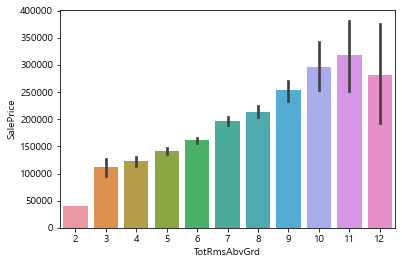

In [165]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

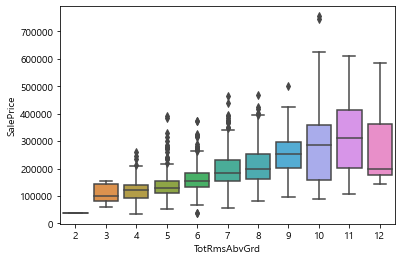

In [166]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [167]:
rm2 = data.loc[data[feature]==2,target]
rm3 = data.loc[data[feature]==3,target]
rm4 = data.loc[data[feature]==4,target]
rm5 = data.loc[data[feature]==5,target]
rm6 = data.loc[data[feature]==6,target]
rm7 = data.loc[data[feature]==7,target]
rm8 = data.loc[data[feature]==8,target]
rm9 = data.loc[data[feature]==9,target]
rm10 = data.loc[data[feature]==10,target]
rm11 = data.loc[data[feature]==11,target]
rm12 = data.loc[data[feature]==12,target]

spst.f_oneway(rm2, rm3, rm4, rm5, rm6, rm7, rm8, rm9, rm10, rm11, rm12)

F_onewayResult(statistic=61.710234688022716, pvalue=2.368532467263881e-104)

3) 관계 평가하기

- 방이 많을수록 집값이 높음
- 9개 이상의 데이터는 표준편차 큼
- 나머지 데이터 이상치 확인
- 박스플롯으로 확인해 보았을 때, 2개, 14개 데이터는 데이터가 거의 없음
- p-value 값이 0에 가깝게 수렴하기 때문에 강한 상관관계라고 판단

##### 추가 분석 (유)

In [168]:
bin = [1, 5, 9, np.inf]
label = ['~4', '5~8', '9~']


data['TotRmsAbvGrd_2'] = pd.cut(data['TotRmsAbvGrd'], bins=bin, labels=label, right=False)

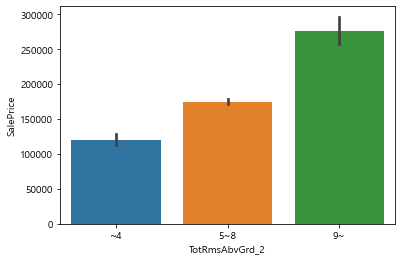

In [169]:
sns.barplot(x='TotRmsAbvGrd_2',y=target, data=data)
plt.show()

In [170]:
tr1 = data.loc[data['TotRmsAbvGrd_2']=='~4',target]
tr2 = data.loc[data['TotRmsAbvGrd_2']=='5~8',target]
tr3 = data.loc[data['TotRmsAbvGrd_2']=='9~',target]

spst.f_oneway(tr1, tr2, tr3)

F_onewayResult(statistic=181.29685514836837, pvalue=5.057064072690088e-71)

##### 추가분석

변수 범주가 차이가 크기 때문에 구간 별로 나누어서 평균 차이 확인

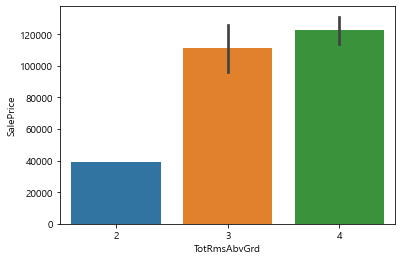

In [171]:
tr1 = data.loc[data[feature] < 5 ]
tr2 = data.loc[(data[feature] >= 5) & (data[feature] < 9)]
tr3 = data.loc[data[feature] >=9]

sns.barplot(x=feature,y=target, data=tr1)
plt.show()


In [172]:
spst.ttest_ind(tr1[target],tr1[feature])

Ttest_indResult(statistic=31.11216637887434, pvalue=1.2124197957119802e-83)

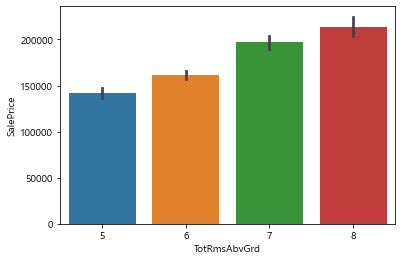

In [173]:
sns.barplot(x=feature,y=target, data=tr2)
plt.show()

In [174]:
spst.ttest_ind(tr2[target],tr2[feature])

Ttest_indResult(statistic=94.84303020939083, pvalue=0.0)

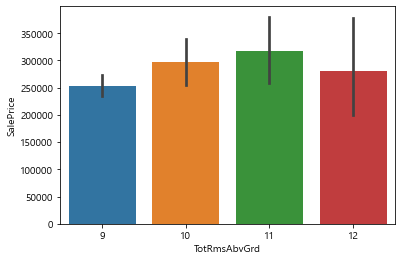

In [175]:
sns.barplot(x=feature,y=target, data=tr3)
plt.show()

In [176]:
spst.ttest_ind(tr3[target],tr3[feature])

Ttest_indResult(statistic=27.088824745819387, pvalue=1.3781316904809365e-82)

- 구간 별로 나눠서 확인해 보았을 때 p-value 0에 가까움

상관관계가 가장 높은 'GrLivArea' 변수와 분석

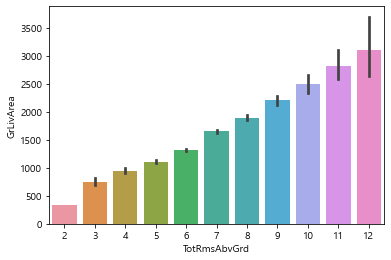

In [177]:
sns.barplot(x='TotRmsAbvGrd', y='GrLivArea', data=data)
plt.show()

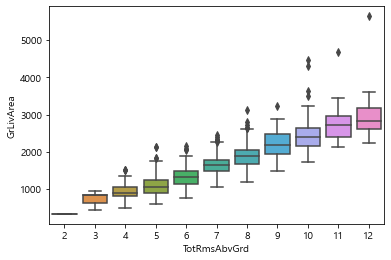

In [178]:
sns.boxplot(x='TotRmsAbvGrd', y='GrLivArea', data=data)
plt.show()

In [179]:
rm2 = data.loc[data[feature]==2,'GrLivArea']
rm3 = data.loc[data[feature]==3,'GrLivArea']
rm4 = data.loc[data[feature]==4,'GrLivArea']
rm5 = data.loc[data[feature]==5,'GrLivArea']
rm6 = data.loc[data[feature]==6,'GrLivArea']
rm7 = data.loc[data[feature]==7,'GrLivArea']
rm8 = data.loc[data[feature]==8,'GrLivArea']
rm9 = data.loc[data[feature]==9,'GrLivArea']
rm10 = data.loc[data[feature]==10,'GrLivArea']
rm11 = data.loc[data[feature]==11,'GrLivArea']
rm12 = data.loc[data[feature]==12,'GrLivArea']

spst.f_oneway(rm2, rm3, rm4, rm5, rm6, rm7, rm8, rm9, rm10, rm11, rm12)

F_onewayResult(statistic=318.7643558013711, pvalue=0.0)

- 완벽한 양의 상관관계 보임 (다중 공선성...?)
- p-vlaue 0, f통계량도 상당히 높은 숫자를 보임
- 방의 개수와 전체 평수는 강한 상관관계 보임

#### ⑦ feature --> target (유)

In [180]:
feature = 'Functional'

1) 시각화

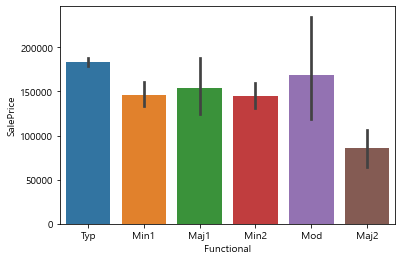

In [181]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

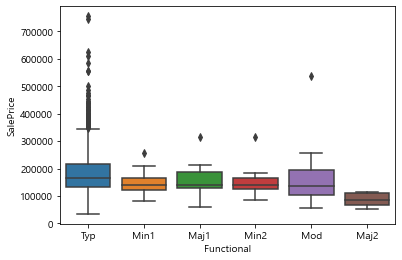

In [182]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [183]:
typ = data.loc[data[feature]=='Typ',target]
min1 = data.loc[data[feature]=='Min1',target]
min2 = data.loc[data[feature]=='Min2',target]
maj1 = data.loc[data[feature]=='Maj1',target]
maj2 = data.loc[data[feature]=='Maj2',target]
mod = data.loc[data[feature]=='Mod',target]

spst.f_oneway(typ, min1, min2, maj1, maj2, mod)

F_onewayResult(statistic=4.783956037631777, pvalue=0.00024257250772289366)

3) 관계 평가하기

- 일반적인 경우에 데이터가 몰려있기 때문에 집값이 가장 높다고 나온 것으로 판단
- Maj1, Maj2, Mod 데이터 표준편차 큼
- 박스플롯 확인했을 때, Typ 이상치 확인되고 Sev 데이터 거의 없음
- 다른 변수들에 비해 p-value값이 크지만 0에 가깝기 때문에 상관관계 있다고 판단

##### 추가 분석 (유의미)

Min끼리 묶어주고 1개뿐인 Sev 데이터도 Min으로 묶어줌, Maj 끼리 묶어주고, Mod는 Typ로 묶어줌

In [184]:
data['Functional_2'] = data[feature].map({'Min1':'Min', 'Min2':'Min',
                                        'Maj1':'Maj', 'Maj2':'Maj',
                                       'Mod':'Typ','Typ':'Typ'})

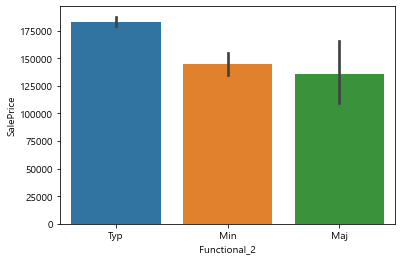

In [185]:
sns.barplot(x='Functional_2', y=target, data=data)
plt.show()

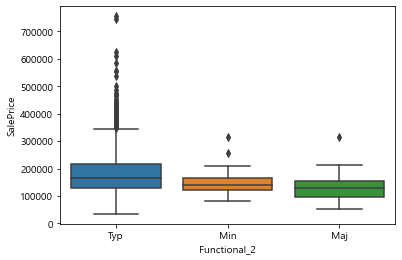

In [186]:
sns.boxplot(x='Functional_2', y=target, data=data)
plt.show()

In [187]:
Min = data.loc[data['Functional_2']=='Min',target]
Maj = data.loc[data['Functional_2']=='Maj',target]
Typ = data.loc[data['Functional_2']=='Typ',target]

spst.f_oneway(Min, Maj, Typ)

F_onewayResult(statistic=10.310762232260897, pvalue=3.577255808099748e-05)

- p-value 값 0에 가까워지고, f통계량 높아짐
- 유의미한 결과라고 볼 수 있음

#### ⑧ feature --> target

In [188]:
feature = 'Fireplaces'

1) 시각화

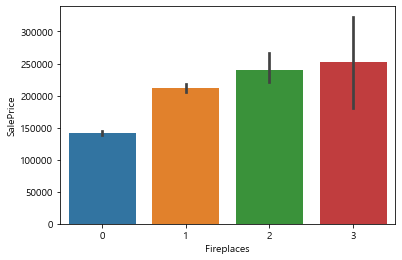

In [189]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

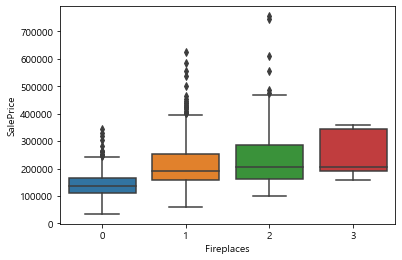

In [190]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [191]:
fp1 = data.loc[data[feature]==0,target]
fp2 = data.loc[data[feature]==1,target]
fp3 = data.loc[data[feature]==2,target]
fp4 = data.loc[data[feature]==3,target]

spst.f_oneway(fp1, fp2, fp3, fp4)

F_onewayResult(statistic=146.97180915040957, pvalue=3.558613012103505e-83)

3) 관계 평가하기

- 3개 집값 평균 가장 높으나 표준편차 큼 (데이터 별로 없기 때문)
- 박스플롯 확인했을 때 데이터 이상치 확인됨
- p-value 0에 가깝기 때문에 상관관계 있다고 판단

##### 추가 분석

벽난로 있다 없다로 데이터 분리

In [192]:
data['Fireplaces_2'] = data[feature].map({0:'N', 1:'Y', 2:'Y',3:'Y'})

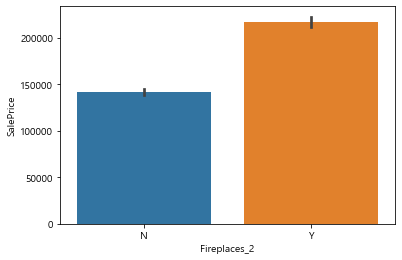

In [193]:
sns.barplot(x='Fireplaces_2', y=target, data=data)
plt.show()

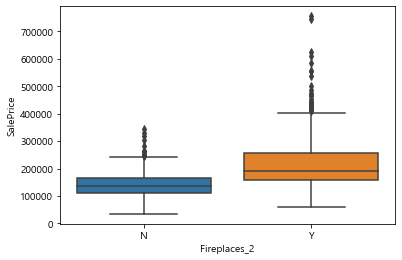

In [194]:
sns.boxplot(x='Fireplaces_2', y=target, data=data)
plt.show()

In [195]:
n = data.loc[data['Fireplaces_2']=='N',target]
y = data.loc[data['Fireplaces_2']=='Y',target]

spst.ttest_ind(n, y)

Ttest_indResult(statistic=-20.459918206340355, pvalue=5.673445271244324e-82)

- 데이터 나누기 전과 큰 차이는 없음
- t통계량 음수, p-value 0에 가깝기 때문에 상관관계 있음

#### ⑨ feature --> target

In [196]:
feature = 'FireplaceQu'

1) 시각화

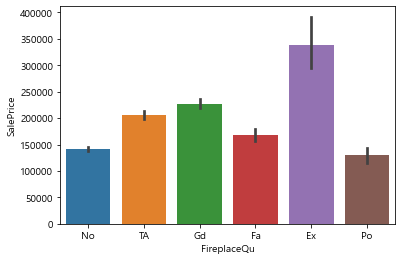

In [197]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

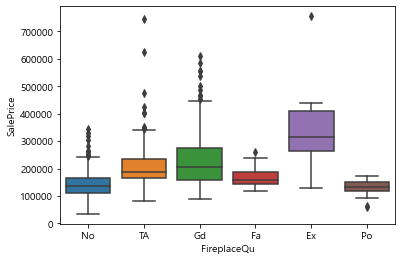

In [198]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [199]:
no = data.loc[data[feature]=='No',target]
ta = data.loc[data[feature]=='TA',target]
gd = data.loc[data[feature]=='Gd',target]
fa = data.loc[data[feature]=='Fa',target]
ex = data.loc[data[feature]=='Ex',target]
po = data.loc[data[feature]=='Po',target]

spst.f_oneway(no, ta, gd, fa, ex, po)

F_onewayResult(statistic=120.79102235959117, pvalue=5.302828566843853e-107)

3) 관계 평가하기

- 벽난로 퀄리티 데이터는 ex데이터가 상당히 적음에도 가장 높은 집 값 평균을 보임
- 모든 데이터에서 이상치 확인 가능 (po 낮은 이상치 데이터, ex, ta 높은 이상치 데이터)
- p-vlaue 0에 수렴하기 때문에 상관관계 있다고 판단

4) 추가 분석할 내용 정리

#### ⑩ feature --> target (애매)

In [200]:
feature = 'GarageType'

1) 시각화

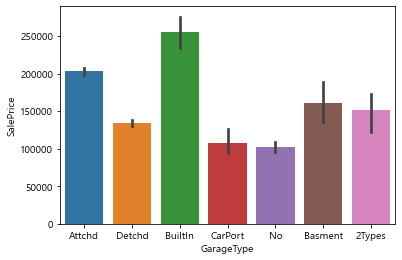

In [201]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

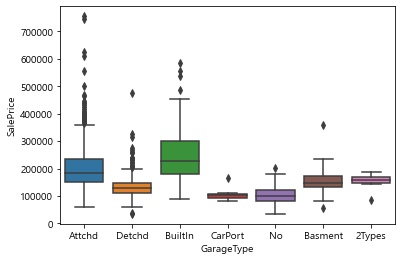

In [202]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [203]:
at = data.loc[data[feature]=='Attchd',target]
dt = data.loc[data[feature]=='Detchd',target]
bt = data.loc[data[feature]=='BuiltIn',target]
cp = data.loc[data[feature]=='CarPort',target]
no = data.loc[data[feature]=='No',target]
bm = data.loc[data[feature]=='Basment',target]
ty = data.loc[data[feature]=='2Types',target]

spst.f_oneway(at, dt, bt, cp, no, bm, ty)

F_onewayResult(statistic=80.49760574491387, pvalue=4.971545083006424e-87)

3) 관계 평가하기

- 빌트인의 경우 집 값의 평균이 가장 높음 (신식 건물일 가능성이 높음)
- 집에 붙어있는 경우의 데이터가 가장 많기 때문에 상당한 이상치 확인됨
- p-value 0에 가깝기 때문에 상관관계 있다고 판단

##### 추가 분석 (유)

차고가 붙어 있고, 떨어져 있고, 다른 위치에 있는 것들끼리 묶어줌

In [204]:
data['GarageType_2'] = data[feature].map({'Attchd':'At', 'Detchd':'Dt', 'BuiltIn':'Others',
                                        'CarPort':'Others','Basment':'Others',
                                        '2Types':'Others','No':'No'})

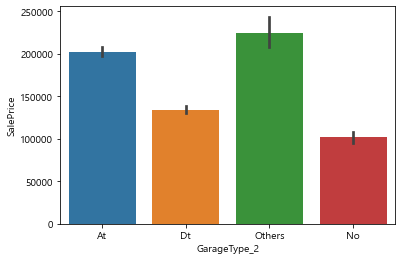

In [205]:
sns.barplot(x='GarageType_2', y=target, data=data)
plt.show()

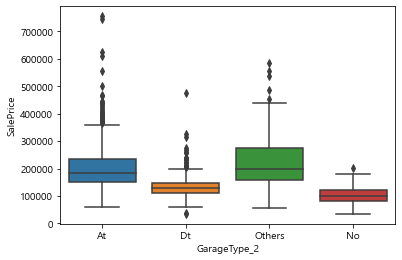

In [206]:
sns.boxplot(x='GarageType_2', y=target, data=data)
plt.show()

In [207]:
at = data.loc[data[feature]=='Attchd',target]
dt = data.loc[data[feature]=='Detchd',target]
no = data.loc[data[feature]=='No',target]
ot = data.loc[data[feature].isin(['BuiltIn','CarPort','Basment','2Types']),target]

spst.f_oneway(at, dt, no, ot)

F_onewayResult(statistic=134.46473474831944, pvalue=7.07886297416525e-77)

- f통계량 높아짐, p-vlaue 0에 가까워지기 때문에 상관관계 있음
- 큰 차이는 없지만 어느 정도 유의미한 결과

#### ⑪ feature --> target (연도)

In [208]:
feature = 'GarageYrBlt'

1) 시각화

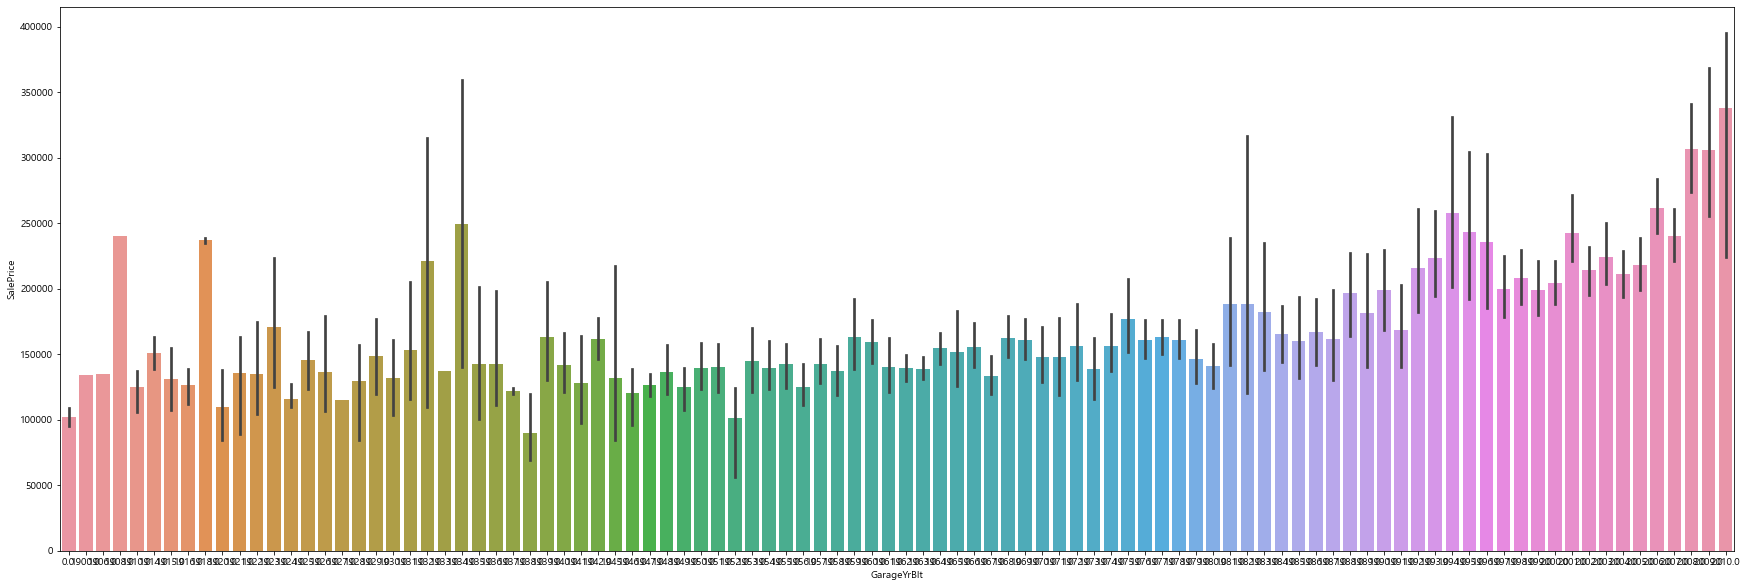

In [209]:
plt.figure(figsize=(30,10))
sns.barplot(x=feature, y=target, data=data)
plt.show()

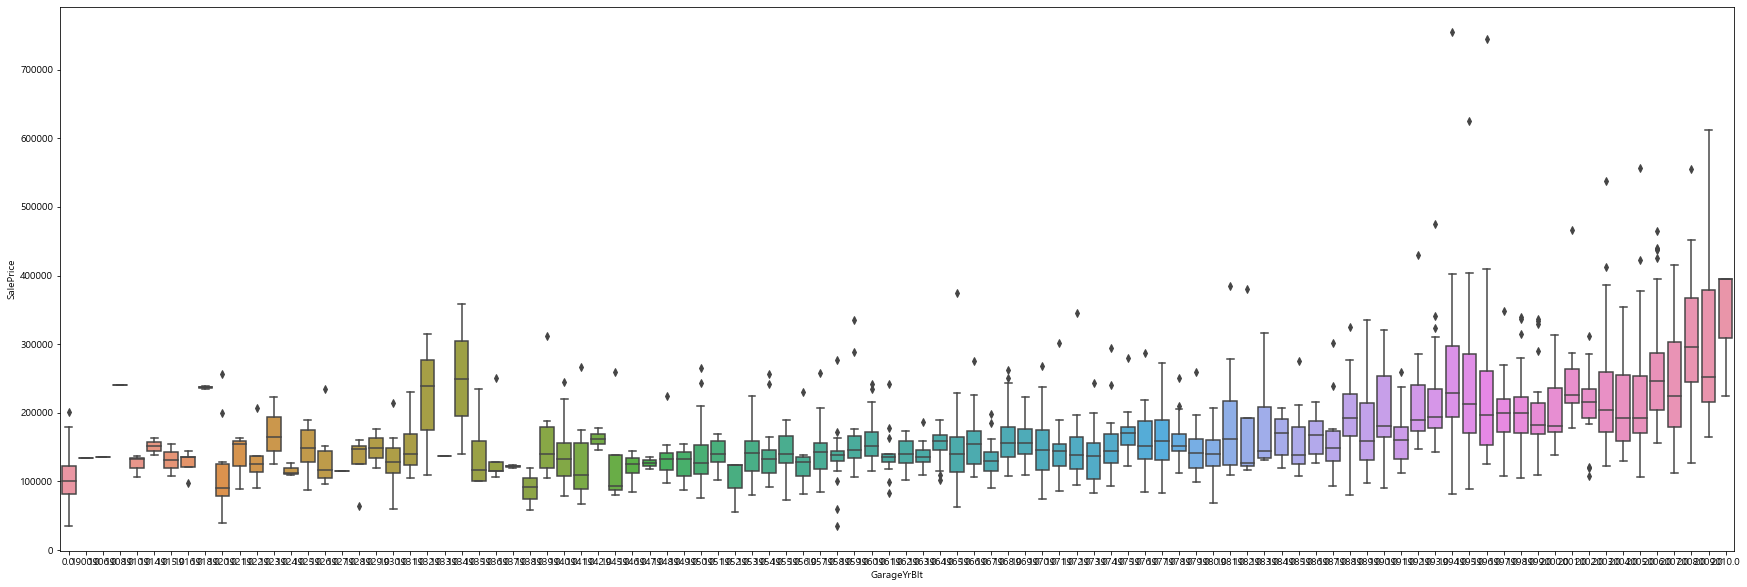

In [210]:
plt.figure(figsize=(30,10))
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 관계 평가하기

- 평가할 수 없음

##### 추가 분석

연도별로 묶어서 분석 (10년씩)

In [211]:
feature = 'GarageYrBlt_2'

3-1) 시각화

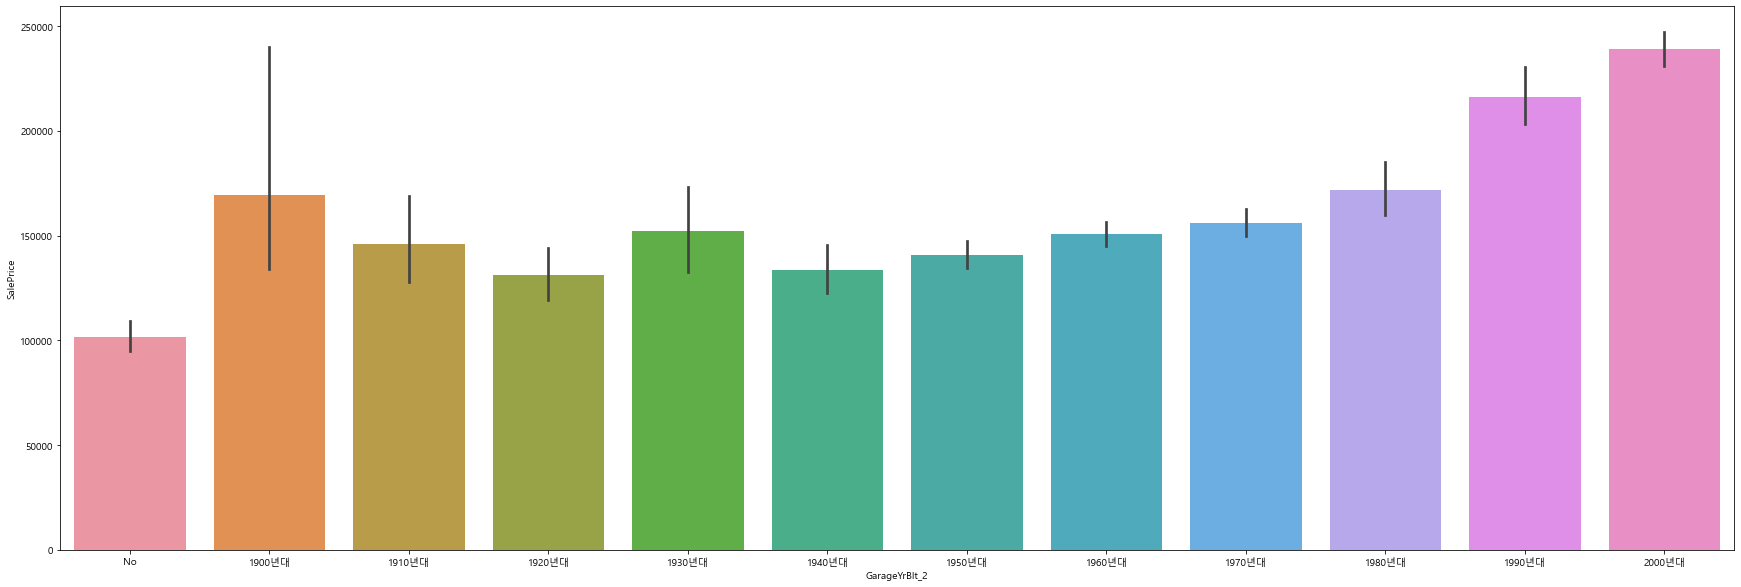

In [212]:
plt.figure(figsize=(30,10))
sns.barplot(x=feature, y=target, data=data)
plt.show()

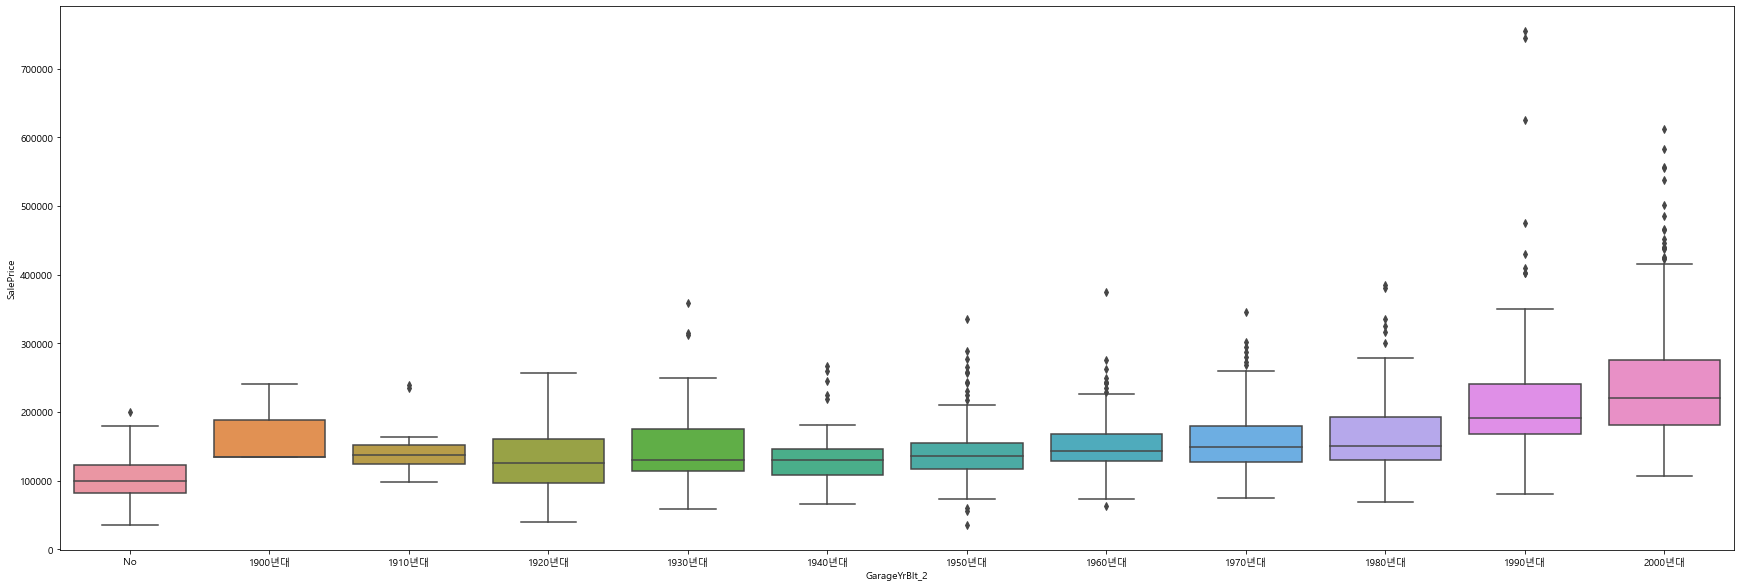

In [213]:
plt.figure(figsize=(30,10))
sns.boxplot(x=feature, y=target, data=data)
plt.show()

3-2) 수치화 : t-test, 분산분석

In [214]:
no = data.loc[data[feature]=='No',target]
yr1 = data.loc[data[feature]=='1900년대',target]
yr2 = data.loc[data[feature]=='1910년대',target]
yr3 = data.loc[data[feature]=='1920년대',target]
yr4 = data.loc[data[feature]=='1930년대',target]
yr5 = data.loc[data[feature]=='1940년대',target]
yr6 = data.loc[data[feature]=='1950년대',target]
yr7 = data.loc[data[feature]=='1960년대',target]
yr8 = data.loc[data[feature]=='1970년대',target]
yr9 = data.loc[data[feature]=='1980년대',target]
yr10 = data.loc[data[feature]=='1990년대',target]
yr11 = data.loc[data[feature]=='2000년대',target]

spst.f_oneway(no, yr1, yr2, yr3, yr4, yr5, yr6, yr7, yr8, yr9, yr10, yr11)

F_onewayResult(statistic=61.47268511775421, pvalue=2.98000821726062e-112)

3-3) 관계 평가하기

- 연도가 높아질수록 집 값의 평균이 높아진다.
- p-value가 0에 가깝기 때문에 상관관계 있다고 판단

#### ⑫ feature --> target (다른)

In [215]:
feature = 'GarageFinish'

1) 시각화

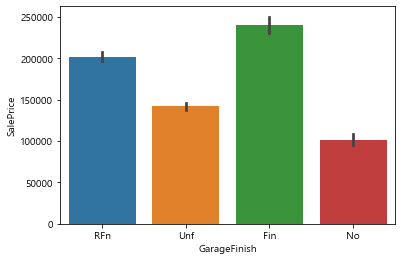

In [216]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

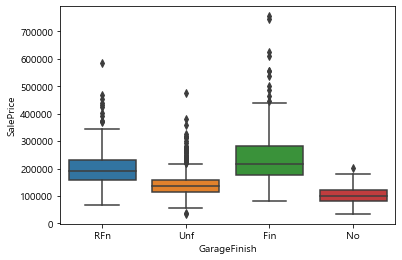

In [217]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [218]:
rfn = data.loc[data[feature]=='RFn',target]
unf = data.loc[data[feature]=='Unf',target]
fin = data.loc[data[feature]=='Fin',target]
no = data.loc[data[feature]=='No',target]

spst.f_oneway(rfn, unf, fin, no)

F_onewayResult(statistic=214.10238131390582, pvalue=5.33012531219218e-115)

3) 관계 평가하기

- 공사가 끝낸 데이터의 집값이 가장 높음
- 모든 데이터 표준편차는 작은 편
- 박스플롯 확인했을 때 모든 데이터 이상치 확인됨
- 다른 변수들에 비해 p-value값이 크지만 0에 가깝기 때문에 상관관계 있다고 판단

##### 추가 분석

YearBuilt 데이터와 비교

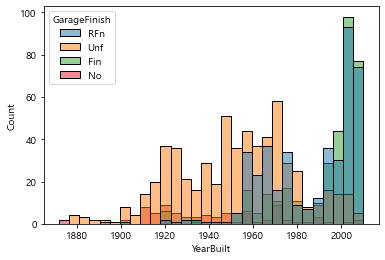

In [219]:
sns.histplot(x='YearBuilt',data=data,hue=feature, bins=30)
plt.show()

- unfinished 데이터가 많음 -> 오래된 집일수록 비율이 훨씬 높음
- 오래된 집들은 노후되어 마감이 잘 안되어 있고, 1980년대 이후로 지어진 집들은 마감이 잘 되어진 경우가 많음
- 신축일수록 차고 마감이 잘 되어있음

#### ⑬ feature --> target

In [220]:
feature = 'GarageCars'

1) 시각화

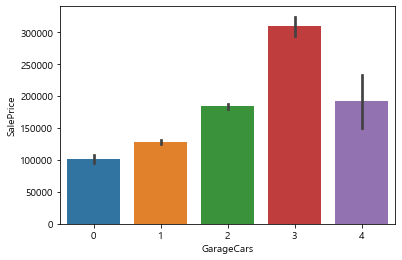

In [221]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

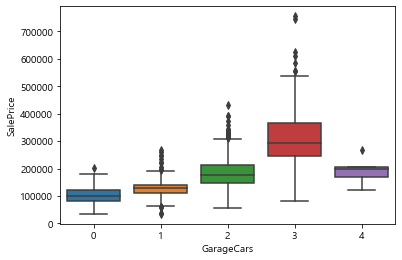

In [222]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [223]:
gc0 = data.loc[data[feature]==0,target]
gc1 = data.loc[data[feature]==1,target]
gc2 = data.loc[data[feature]==2,target]
gc3 = data.loc[data[feature]==3,target]
gc4 = data.loc[data[feature]==4,target]

spst.f_oneway(gc0, gc1, gc2, gc3, gc4)

F_onewayResult(statistic=352.0287016481662, pvalue=6.423496866748168e-212)

3) 관계 평가하기

- f통계량 매우 높고, p-value 0에 수렴하기 때문에 강한 상관관계
- 수용 가능한 차가 3대일 때 집 값의 평균이 가장 높음
- 3대인 데이터에 높은 이상치 데이터 확인되고, 4대인 경우가 5개의 데이터밖에 없기 때문인 것으로 추정
- 차고가 없는 데이터는 집 값 평균이 가장 낮음

##### 추가 분석

In [224]:
data['GarageCars_2'] = data[feature].map({0:'No', 1:'1대', 2:'2대',3:'3대 이상',4:'3대 이상'})

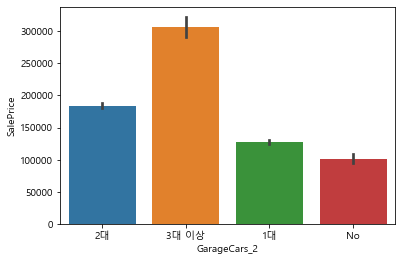

In [225]:
sns.barplot(x='GarageCars_2', y=target, data=data)
plt.show()

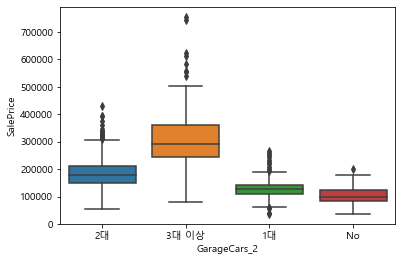

In [226]:
sns.boxplot(x='GarageCars_2', y=target, data=data)
plt.show()

In [227]:
car0 = data.loc[data['GarageCars_2']=='No',target]
car1 = data.loc[data['GarageCars_2']=='1대',target]
car2 = data.loc[data['GarageCars_2']=='2대',target]
car3 = data.loc[data['GarageCars_2']=='3대 이상',target]

spst.f_oneway(car0, car1, car2, car3)

F_onewayResult(statistic=456.2884885348042, pvalue=7.904404068035168e-209)

- f통계량 높아짐, p-value는 큰 차이 없음
- 강한 상관관계 보임
- 어느 정도 유의미 하다고 판단

#### ⑭ feature --> target

In [228]:
feature = 'GarageQual'

1) 시각화

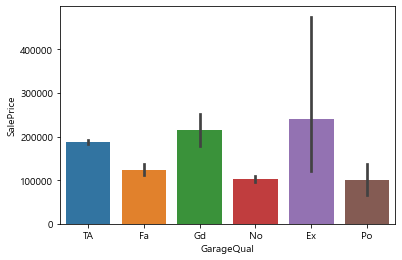

In [229]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

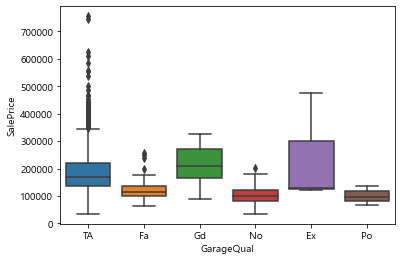

In [230]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [231]:
TA = data.loc[data[feature]=='TA',target]
Fa = data.loc[data[feature]=='Fa',target]
Gd = data.loc[data[feature]=='Gd',target]
Ex = data.loc[data[feature]=='Ex',target]
Po = data.loc[data[feature]=='Po',target]

spst.f_oneway(TA, Fa, Gd, Ex, Po)

F_onewayResult(statistic=9.576828570224242, pvalue=1.2263214022831295e-07)

3) 관계 평가하기

- Gd, Ex 표준편차는 큰 편이고, 집값이 높음
- 박스플롯 확인했을 때 TA, Fa 데이터 이상치 확인됨
- 다른 변수들에 비해 p-value값이 크지만 0에 가깝기 때문에 상관관계 있다고 판단

#### ⑮ feature --> target

In [232]:
feature = 'GarageCond'

1) 시각화

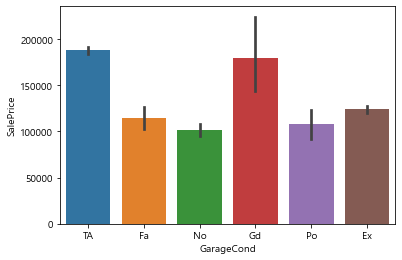

In [233]:
sns.barplot(x=feature, y=target, data=data)
plt.show()

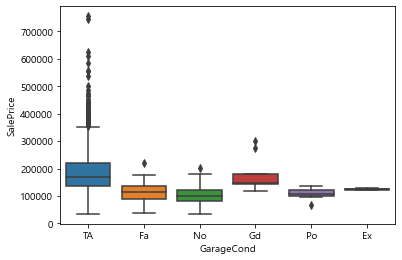

In [234]:
sns.boxplot(x=feature, y=target, data=data)
plt.show()

2) 수치화 : t-test, 분산분석

In [235]:
no = data.loc[data[feature]=='No',target]
ta = data.loc[data[feature]=='TA',target]
gd = data.loc[data[feature]=='Gd',target]
fa = data.loc[data[feature]=='Fa',target]
ex = data.loc[data[feature]=='Ex',target]
po = data.loc[data[feature]=='Po',target]

spst.f_oneway(no, ta, gd, fa, ex, po)

F_onewayResult(statistic=26.001879985412632, pvalue=3.263871685753581e-25)

3) 관계 평가하기

- 일반적이거나 상태가 좋은 집 값의 평균이 높음
- 집 값이 좋은 데이터의 표준편차는 매우 큼
- 다른 관계에 비해서는 낮지만 p-value 0에 가깝기 때문에 상관관계 있다고 판단

##### 추가 분석 (유)

GarageQual 데이터와 유사한데 상관관계 더 강하다고 판단되어 추가 분석

In [236]:
data['GarageCond_2'] = data[feature].map({'TA':'TA', 'No':'No', 'Ex':'Gd','Gd':'Gd','Fa':'Po','Po':'Po'})

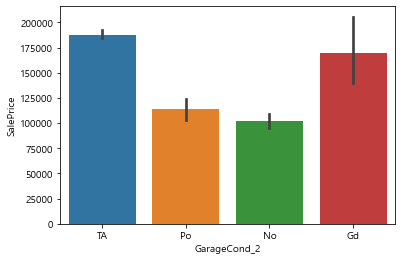

In [237]:
sns.barplot(x='GarageCond_2', y=target, data=data)
plt.show()

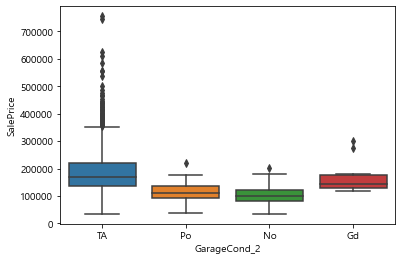

In [238]:
sns.boxplot(x='GarageCond_2', y=target, data=data)
plt.show()

In [239]:
gd = data.loc[data[feature].isin(['Ex','Gd']),target]
no = data.loc[data[feature]=='No',target]
ta = data.loc[data[feature]=='TA',target]
po = data.loc[data[feature].isin(['Fa','Po']),target]

spst.f_oneway(gd, no, ta,  po)

F_onewayResult(statistic=43.0627413673604, pvalue=1.1682149640728185e-26)

- f통계량 높아지고, p-value 0 에 더 가까워짐
- TA 제외하고 데이터가 너무 적어 비슷한 유형의 데이터 묶어주었더니 유의미한 결과 도출

### (2) 숫자형 X --> 숫자형 Y

* 시각화 : scatter, jointplot, regplot
* 상관분석
* 관계 평가

#### ① feature --> target

In [240]:
feature = 'GarageArea'

1) 시각화

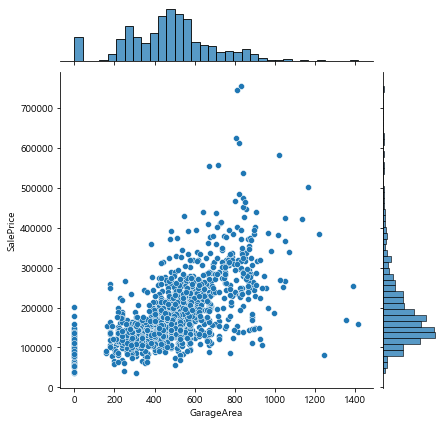

In [241]:
sns.jointplot(x=feature, y=target, data=data)
plt.show()

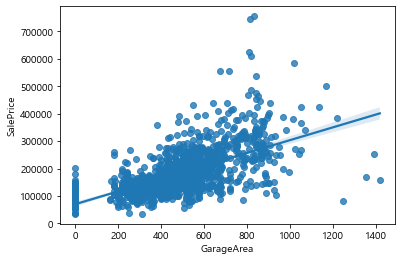

In [242]:
sns.regplot(x=feature, y=target, data=data)
plt.show()

2) 상관분석

In [243]:
result = spst.pearsonr(data[feature], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.6254067810004029, p-value : 5.801603362421128e-159


3) 관계 평가하기

- 0 값을 제외하고 그려진 그래프의 모양이 강한 양의 상관관계 있다고 보여짐
- 이상치 데이터도 확인 됨
- p-value 값이 0에 가깝게 수렴하기 때문에 강한 상관관계라고 판단

4) 추가 분석하기

차고가 없는 데이터 제외하고 그려보기

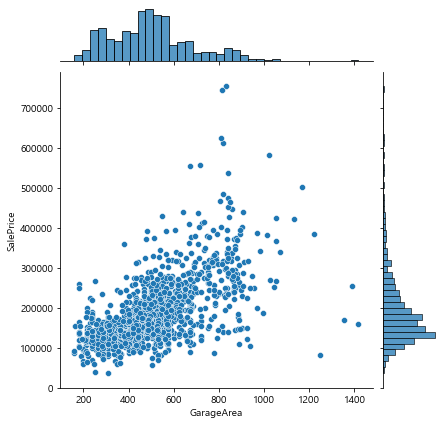

In [244]:
data2 = data.loc[(data[feature] >= 10) ]

sns.jointplot(x=feature, y=target, data=data2)
plt.show()


In [245]:
result = spst.pearsonr(data2[feature], data2[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.608842595460181, p-value : 1.4679472156476196e-140
